# Analyse globale sur tous les départements

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import geopandas as gpd
import pickle 

from shapely.geometry import Point
import contextily as ctx


In [2]:
departements={"01":"Ain","02":"Aisne","03":"Allier","04":"Alpes-de-Haute-Provence","05":"Hautes-Alpes","06":"Alpes-Maritimes","07":"Ardèche","08":"Ardennes","09":"Ariège","10":"Aube","11":"Aude","12":"Aveyron","13":"Bouches-du-Rhône","14":"Calvados","15":"Cantal","16":"Charente","17":"Charente-Maritime","18":"Cher","19":"Corrèze","2A":"Corse-du-Sud","2B":"Haute-Corse","21":"Côte-d'Or","22":"Côtes-d'Armor","23":"Creuse","24":"Dordogne","25":"Doubs","26":"Drôme","27":"Eure","28":"Eure-et-Loir","29":"Finistère","30":"Gard","31":"Haute-Garonne","32":"Gers","33":"Gironde","34":"Hérault","35":"Ille-et-Vilaine","36":"Indre","37":"Indre-et-Loire","38":"Isère","39":"Jura","40":"Landes","41":"Loir-et-Cher","42":"Loire","43":"Haute-Loire","44":"Loire-Atlantique","45":"Loiret","46":"Lot","47":"Lot-et-Garonne","48":"Lozère","49":"Maine-et-Loire","50":"Manche","51":"Marne","52":"Haute-Marne","53":"Mayenne","54":"Meurthe-et-Moselle","55":"Meuse","56":"Morbihan","57":"Moselle","58":"Nièvre","59":"Nord","60":"Oise","61":"Orne","62":"Pas-de-Calais","63":"Puy-de-Dôme","64":"Pyrénées-Atlantiques","65":"Hautes-Pyrénées","66":"Pyrénées-Orientales","67":"Bas-Rhin","68":"Haut-Rhin","69":"Rhône","70":"Haute-Saône","71":"Saône-et-Loire","72":"Sarthe","73":"Savoie","74":"Haute-Savoie","75":"Paris","76":"Seine-Maritime","77":"Seine-et-Marne","78":"Yvelines","79":"Deux-Sèvres","80":"Somme","81":"Tarn","82":"Tarn-et-Garonne","83":"Var","84":"Vaucluse","85":"Vendée","86":"Vienne","87":"Haute-Vienne","88":"Vosges","89":"Yonne","90":"Territoire de Belfort","91":"Essonne","92":"Hauts-de-Seine","93":"Seine-Saint-Denis","94":"Val-de-Marne","95":"Val-d'Oise"}


### Cartographie française des réseaux de chaleur 

In [3]:

coordonnees_grands_reseaux=[]
coordonnees_petits_reseaux=[]
nb_buildings_grands_reseaux=[]
nb_buildings_petits_reseaux=[]
nb_buildings_connected_grands_reseaux=[]
nb_buildings_connected_petits_reseaux=[]


global_path="/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/National_Scale/Storage_results/"

for departement in departements.keys():

    file_selected_big=global_path+f"dep_{departement}/selected_communes.csv"
    file_selected_small=global_path+f"dep_{departement}/small_networks.csv"

    df_big=pd.read_csv(file_selected_big, sep=",")
    df_small=pd.read_csv(file_selected_small, sep=",")
    df_big["departement"]=departement
    df_small["departement"]=departement
    df_big["commune"]=df_big["commune"].astype(str).str.zfill(5)
    df_small["commune"]=df_small["commune"].astype(str).str.zfill(5)

    liste_communes_big=df_big["commune"].tolist()
    liste_communes_small=df_small["commune"].tolist()

    for commune in liste_communes_big:
        #fichier pickle
        path_big=global_path+f"dep_{departement}/communes/{commune}.pkl"
        with open(path_big, "rb") as f:
            data = pickle.load(f)
            graph=data["graph"]
            plant_coordinates=graph.ip_plant.building_coordinates[0]
            coordonnees_grands_reseaux.append(plant_coordinates)
            nb_buildings_grands_reseaux.append(len(data["liste_nodes_buildings"]))
            nb_buildings_connected_grands_reseaux.append(len(data["connected_buildings"]))


    for commune in liste_communes_small:
        path_small=global_path+f"dep_{departement}/small_networks/{commune}.pkl"
        with open(path_small, "rb") as f:
            data = pickle.load(f)
            graph=data["graph"]
            plant_coordinates=graph.ip_plant.building_coordinates[0]
            coordonnees_petits_reseaux.append(plant_coordinates)
            nb_buildings_petits_reseaux.append(len(data["liste_nodes_buildings"]))
            nb_buildings_connected_petits_reseaux.append(len(data["connected_buildings"]))
   







In [4]:
#nombre total de bâtiments connectés 
nb_buildings_big=sum(nb_buildings_grands_reseaux)
nb_buildings_small=sum(nb_buildings_petits_reseaux)
nb_buildings_total=nb_buildings_big+nb_buildings_small
print("Nombre total de bâtiments connectés :", nb_buildings_total)
print("Nombre total de bâtiments connectés aux grands réseaux :", nb_buildings_big)
print("Nombre total de bâtiments connectés aux petits réseaux :", nb_buildings_small)

Nombre total de bâtiments connectés : 763154
Nombre total de bâtiments connectés aux grands réseaux : 652546
Nombre total de bâtiments connectés aux petits réseaux : 110608


In [5]:
# Création du DataFrame
df_big_trace=pd.DataFrame({
    "longitude": [coord[0] for coord in coordonnees_grands_reseaux],
    "latitude": [coord[1] for coord in coordonnees_grands_reseaux],
    "nb_buildings": nb_buildings_grands_reseaux,
    "nb_buildings_connected": nb_buildings_connected_grands_reseaux,
})

df_small_trace=pd.DataFrame({
    "longitude": [coord[0] for coord in coordonnees_petits_reseaux],
    "latitude": [coord[1] for coord in coordonnees_petits_reseaux],
    "nb_buildings": nb_buildings_petits_reseaux,
    "nb_buildings_connected": nb_buildings_connected_petits_reseaux
})

#df_big= pd.DataFrame(coordonnees_grands_reseaux, nb_buildings_grands_reseaux, nb_buildings_connected_grands_reseaux, columns=["longitude", "latitude","nb_buildings","nb_buildings_connected"])
#df_small= pd.DataFrame(coordonnees_petits_reseaux, nb_buildings_petits_reseaux, nb_buildings_connected_petits_reseaux, columns=["longitude", "latitude","nb_buildings","nb_buildings_connected"])
# Passage en GeoDataFrame
gdf_big = gpd.GeoDataFrame(
    df_big_trace,
    geometry=gpd.points_from_xy(df_big_trace.longitude, df_big_trace.latitude),
    crs="EPSG:2154"  # WGS84
)


gdf_small = gpd.GeoDataFrame(
    df_small_trace,
    geometry=gpd.points_from_xy(df_small_trace.longitude, df_small_trace.latitude),
    crs="EPSG:2154"  # WGS84
)


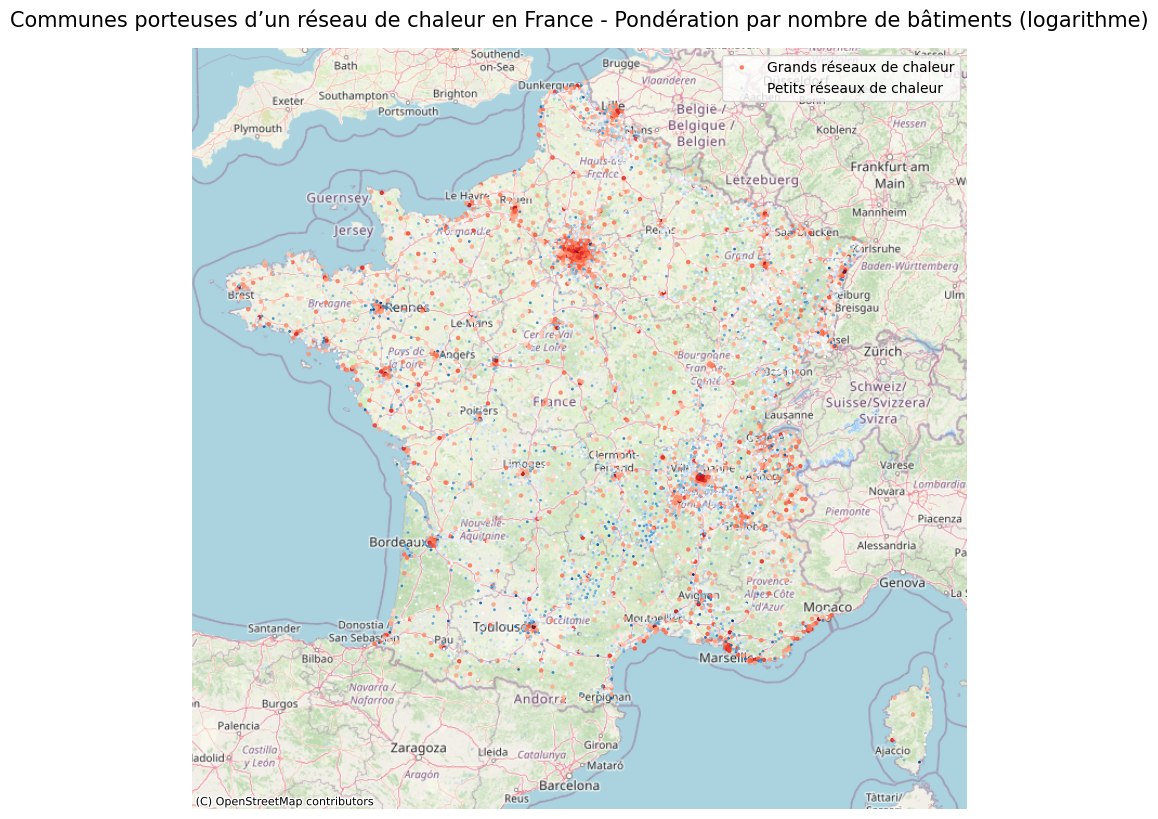

In [34]:
# Points des communes
gdf_big["nb_buildings_log"] = np.log10(gdf_big["nb_buildings"])
gdf_small["nb_buildings_log"] = np.log10(gdf_small["nb_buildings"])


gdf_big = gdf_big.to_crs(epsg=3857)
gdf_small = gdf_small.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))

gdf_big.plot(
    ax=ax,
    column="nb_buildings_log",
    cmap="Reds",
    markersize=5,
    alpha=0.8
)

gdf_small.plot(
    ax=ax,
    column="nb_buildings_log",
    cmap="Blues",
    markersize=1,
    alpha=1
    
)
# Fond de carte OpenStreetMap
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik
)

ax.legend(["Grands réseaux de chaleur", "Petits réseaux de chaleur"], loc="upper right")

ax.set_title("Communes porteuses d’un réseau de chaleur en France - Pondération par nombre de bâtiments (logarithme)", fontsize=15, pad=15)
ax.set_axis_off()

plt.show()

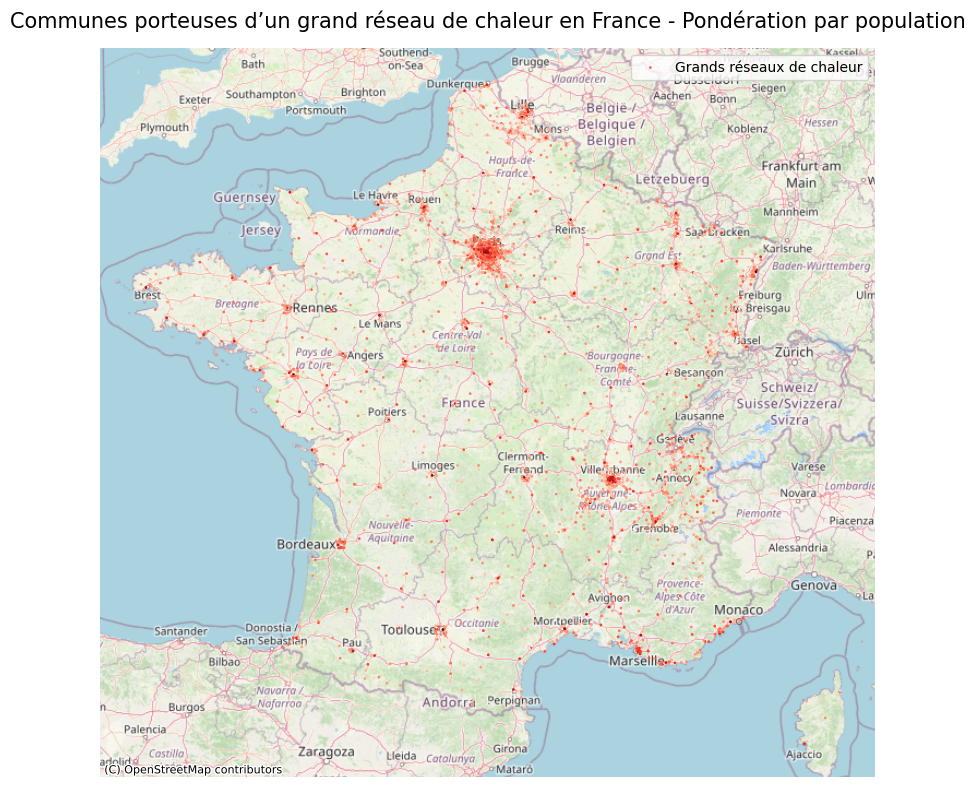

In [33]:
# Points des communes


fig, ax = plt.subplots(figsize=(10, 10))

gdf_big.plot(
    ax=ax,
    column="nb_buildings_log",
    cmap="Reds",
    markersize=1,
    alpha=1
)
# Fond de carte OpenStreetMap
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik
)

ax.legend(["Grands réseaux de chaleur"], loc="upper right")

ax.set_title("Communes porteuses d’un grand réseau de chaleur en France - Pondération par population", fontsize=15, pad=15)
ax.set_axis_off()

plt.show()

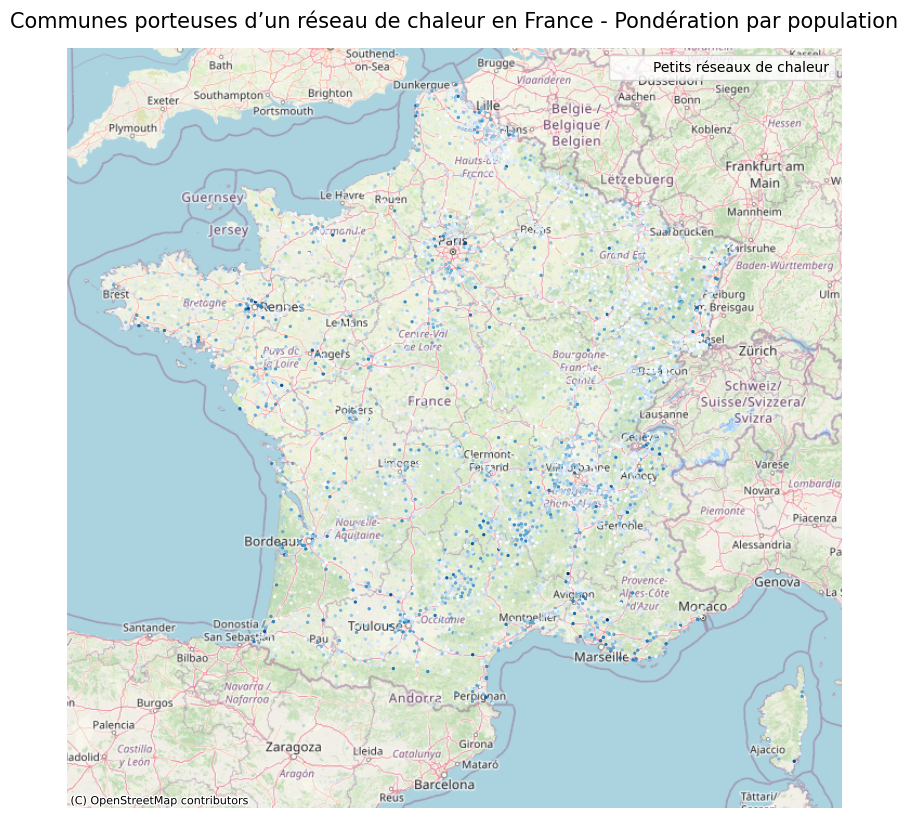

In [37]:
# Points des communes

fig, ax = plt.subplots(figsize=(10, 10))

gdf_small.plot(
    ax=ax,
    column="nb_buildings_log",
    cmap="Blues",
    markersize=2,
    alpha=1
)
# Fond de carte OpenStreetMap
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik
)

ax.legend(["Petits réseaux de chaleur"], loc="upper right")

ax.set_title("Communes porteuses d’un réseau de chaleur en France - Pondération par population", fontsize=15, pad=15)
ax.set_axis_off()

plt.show()

In [6]:
path="/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/National_Scale/Storage_results/"
#Info fichier json
nb_reseaux={}
nb_communes={}
nb_petits_reseaux={}


taux_rejet={}
taux_selection_global={}
taux_small_network={}
taux_big_network={}

#Info fichier csv 
network_length_km_big={}
heat_coverage_MWh_big ={}
percentage_heat_coverage_big={}
density_MWh_big={}
nb_buildings_connected_big={}
idx_plant_big={}

#Small networks
network_length_km_small={}
heat_coverage_MWh_small ={}
percentage_heat_coverage_small={}
density_MWh_small={}
nb_buildings_connected_small={}
idx_plant_small={}


for numero_departement in departements.keys():
    general_path=path+f"dep_{numero_departement}/meta.json"

    with open(general_path, 'r') as f:
        data = json.load(f)
        nb_reseaux[numero_departement] = data["nb_selected_final"]
        nb_petits_reseaux[numero_departement] = data["nb_small_networks"]
        nb_communes[numero_departement] = data["nb_communes_total"]
        taux_selection_global[numero_departement] = data["nb_selected_final"] / data["nb_communes_total"]
        taux_rejet[numero_departement] = data["nb_rejected"] / data["nb_communes_total"]
        taux_small_network[numero_departement] = data["nb_small_networks"] / data["nb_selected_final"] if data["nb_selected_final"] > 0 else 0
        taux_big_network[numero_departement] = (data["nb_selected_final"] - data["nb_small_networks"]) / data["nb_selected_final"] if data["nb_selected_final"] > 0 else 0    

    
    selected_path=path+f"dep_{numero_departement}/selected_communes.csv"
    small_network_path=path+f"dep_{numero_departement}/small_networks.csv"

    nb_buildings_connected_big[numero_departement]=[]
    network_length_km_big[numero_departement]=[]
    heat_coverage_MWh_big[numero_departement]=[]
    percentage_heat_coverage_big[numero_departement]=[]
    density_MWh_big[numero_departement]=[]
    idx_plant_big[numero_departement]=[]


    nb_buildings_connected_small[numero_departement]=[]
    network_length_km_small[numero_departement]=[]
    heat_coverage_MWh_small[numero_departement]=[]
    percentage_heat_coverage_small[numero_departement]=[]
    density_MWh_small[numero_departement]=[]
    idx_plant_small[numero_departement]=[]
    
    with open(selected_path, 'r') as f:
        next(f)  # Skip header line
        for line in f:
            parts = line.strip().split(',')
            nb_buildings_connected_big[numero_departement].append(int(parts[2]))
            network_length_km_big[numero_departement].append(float(parts[3]))
            heat_coverage_MWh_big[numero_departement].append(float(parts[4]))
            percentage_heat_coverage_big[numero_departement].append(float(parts[5]))
            density_MWh_big[numero_departement].append(float(parts[6]))
            idx_plant_big[numero_departement].append(parts[7])  
    
    with open(small_network_path, 'r') as f:
        next(f)  # Skip header line
        for line in f:
            parts = line.strip().split(',')
            nb_buildings_connected_small[numero_departement].append(int(parts[2]))
            network_length_km_small[numero_departement].append(float(parts[3]))
            heat_coverage_MWh_small[numero_departement].append(float(parts[4]))
            percentage_heat_coverage_small[numero_departement].append(float(parts[5]))
            density_MWh_small[numero_departement].append(float(parts[6]))
            idx_plant_small[numero_departement].append(parts[7])  

            
print("Nombre total de réseaux de chaleur sélectionnés :", sum(nb_reseaux.values()))
print("Nombre total de grands réseaux de chaleur sélectionnés :", sum(nb_reseaux.values())-sum(nb_petits_reseaux.values()))
print("Nombre total de petits réseaux de chaleur sélectionnés :", sum(nb_petits_reseaux.values()))
print("Nombre total de communes :", sum(nb_communes.values()))

Nombre total de réseaux de chaleur sélectionnés : 8295
Nombre total de grands réseaux de chaleur sélectionnés : 3220
Nombre total de petits réseaux de chaleur sélectionnés : 5075
Nombre total de communes : 34861


Remarque : les taux sont calculés par rapport au nombre de communes dans le département.

## Statistique globale

On construit df_big et df_small qui contiennent tous les réseaux de chaleur de toute la France, avec df_big les réseaux ayant plus de 10 bâtiments connectés. Les tables d'attributs contiennent le nombre de bâtiments connectés, la longueur totale du réseau en km, la quantité de chaleur demandée en MWh/an, le pourcentage de la demande en chaleur de la commune fournie par le réseau, la densité énergétique linéaire du réseau et l'index du bâtiment de départ. 

In [7]:
#Grands réseaux 
rows = []

for dep in network_length_km_big.keys():
    for i in range(len(network_length_km_big[dep])):
        rows.append({
            "departement": dep,
            "network_length_km": network_length_km_big[dep][i],
            "heat_coverage_MWh": heat_coverage_MWh_big[dep][i],
            "percentage_heat_coverage": percentage_heat_coverage_big[dep][i],
            "density_MWh": density_MWh_big[dep][i],
            "nb_buildings_connected": nb_buildings_connected_big[dep][i],
            "taux_big_network" : taux_big_network[dep]
        })

pd.options.display.float_format = "{:.2f}".format
df_big=pd.DataFrame(rows)
df_big["nb_buildings"]=nb_buildings_grands_reseaux

print(df_big.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))






       network_length_km  heat_coverage_MWh  percentage_heat_coverage  \
count            3220.00            3220.00                   3220.00   
mean               16.81           33747.43                     68.19   
std                41.56           96382.68                     25.69   
min                 0.27             754.00                      4.62   
10%                 1.10            1803.90                     31.34   
25%                 1.89            2976.50                     46.65   
50%                 4.11            6418.50                     70.87   
75%                13.98           21571.50                     93.65   
90%                40.53           74380.00                     99.98   
max               890.98         1562429.00                    100.00   

       density_MWh  nb_buildings_connected  taux_big_network  nb_buildings  
count      3220.00                 3220.00           3220.00       3220.00  
mean          1.70                  164.43

In [8]:
#Petits réseaux
rows_small = [] 

for dep in network_length_km_small.keys():
    for i in range(len(network_length_km_small[dep])):
        rows_small.append({
            "departement": dep,
            "network_length_km": network_length_km_small[dep][i],
            "heat_coverage_MWh": heat_coverage_MWh_small[dep][i],
            "percentage_heat_coverage": percentage_heat_coverage_small[dep][i],
            "density_MWh": density_MWh_small[dep][i],
            "nb_buildings_connected": nb_buildings_connected_small[dep][i],
            "taux_small_network" :taux_small_network[dep]
        })

pd.options.display.float_format = "{:.2f}".format

df_small = pd.DataFrame(rows_small)
df_small["nb_buildings"]=nb_buildings_petits_reseaux
print(df_small.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))


       network_length_km  heat_coverage_MWh  percentage_heat_coverage  \
count            5075.00            5075.00                   5075.00   
mean                0.42             801.78                     32.72   
std                 0.40             681.45                     16.71   
min                 0.00             132.00                      3.71   
10%                 0.08             241.00                     14.81   
25%                 0.15             363.00                     20.37   
50%                 0.30             619.00                     28.94   
75%                 0.58            1027.50                     41.48   
90%                 0.91            1585.00                     56.73   
max                 9.10           17130.00                     97.72   

       density_MWh  nb_buildings_connected  taux_small_network  nb_buildings  
count      5075.00                 5075.00             5075.00       5075.00  
mean          2.76                    

In [9]:
df_total=pd.concat([df_big, df_small], ignore_index=True)
#ajouter taux de rejet et taux de sélection global par département

for dep in departements.keys():
    df_total.loc[df_total["departement"]==dep, "taux_rejet"] =taux_rejet[dep]
    df_total.loc[df_total["departement"]==dep, "taux_selection_global"] = taux_selection_global[dep]

pd.options.display.float_format = "{:.2f}".format

print(df_total.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

       network_length_km  heat_coverage_MWh  percentage_heat_coverage  \
count            8295.00            8295.00                   8295.00   
mean                6.78           13590.81                     46.49   
std                27.10           62157.15                     26.94   
min                 0.00             132.00                      3.71   
10%                 0.11             291.00                     17.16   
25%                 0.24             514.50                     24.51   
50%                 0.66            1160.00                     38.68   
75%                 2.53            3973.00                     64.56   
90%                13.43           20497.80                     93.29   
max               890.98         1562429.00                    100.00   

       density_MWh  nb_buildings_connected  taux_big_network  nb_buildings  \
count      8295.00                 8295.00           3220.00       8295.00   
mean          2.35                   66.

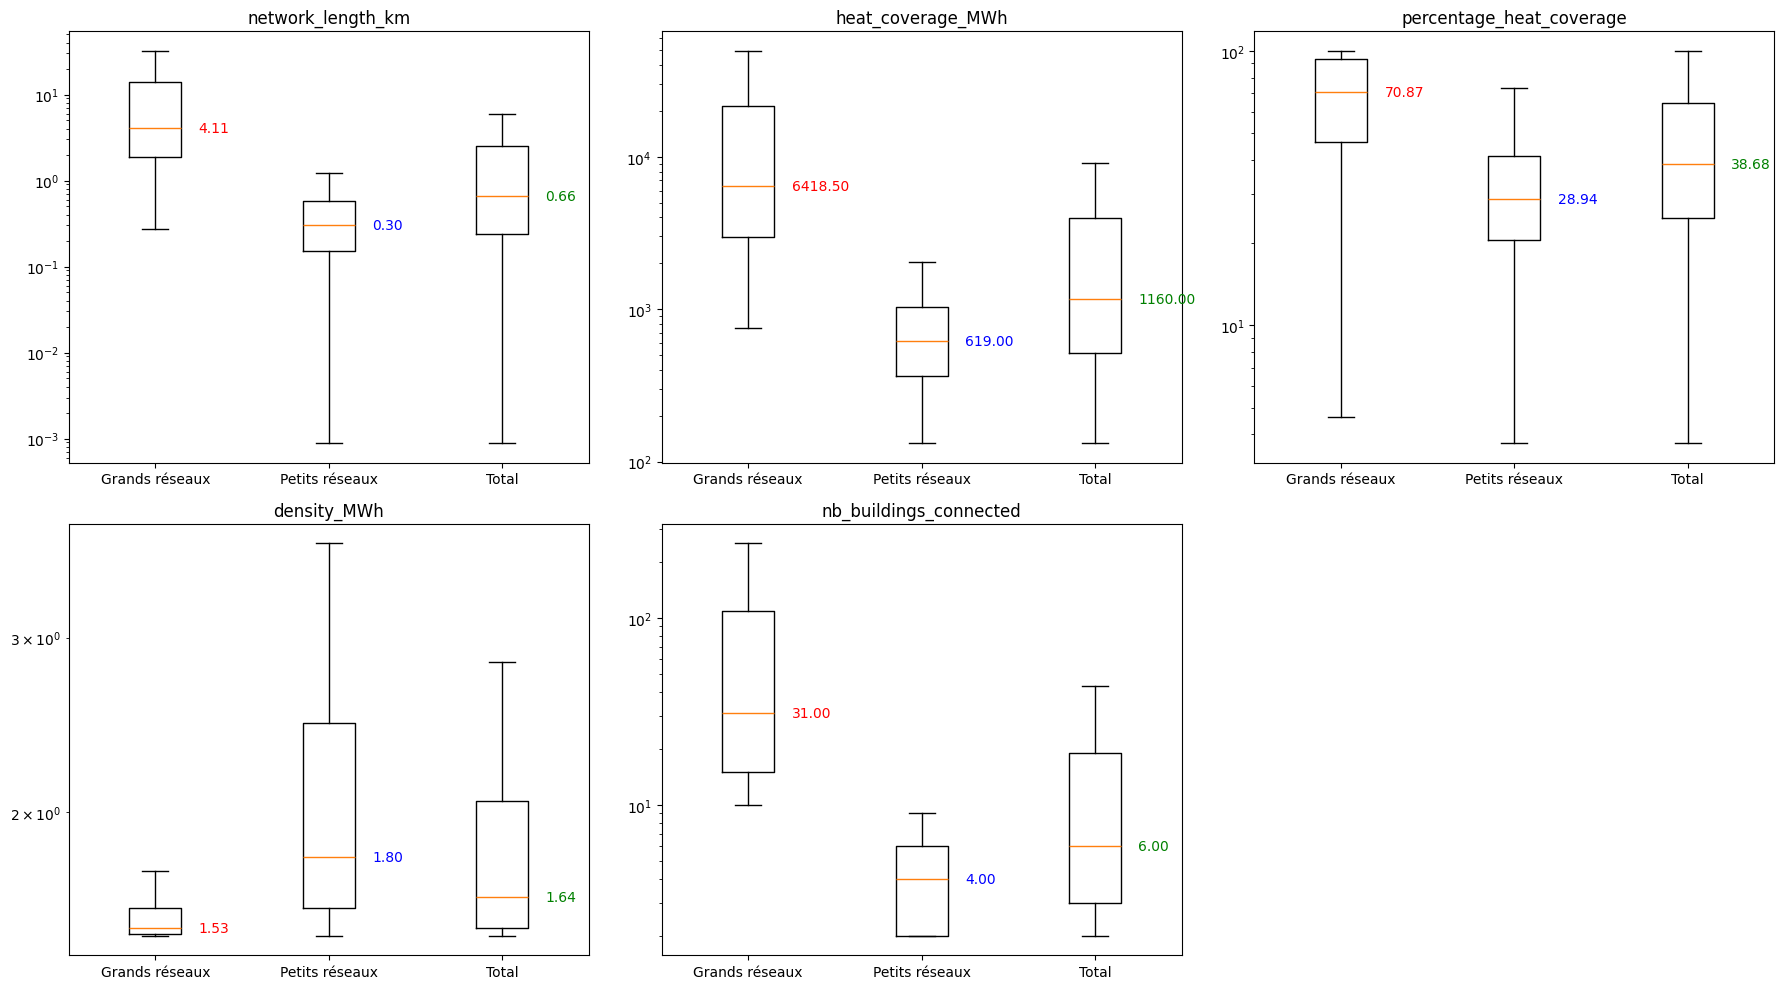

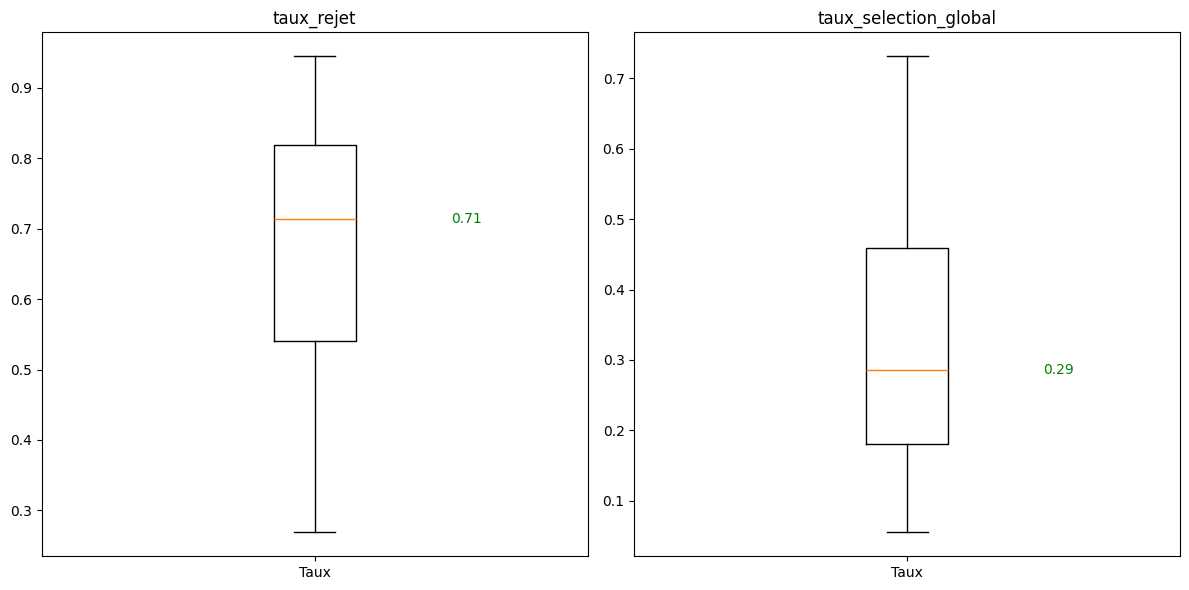

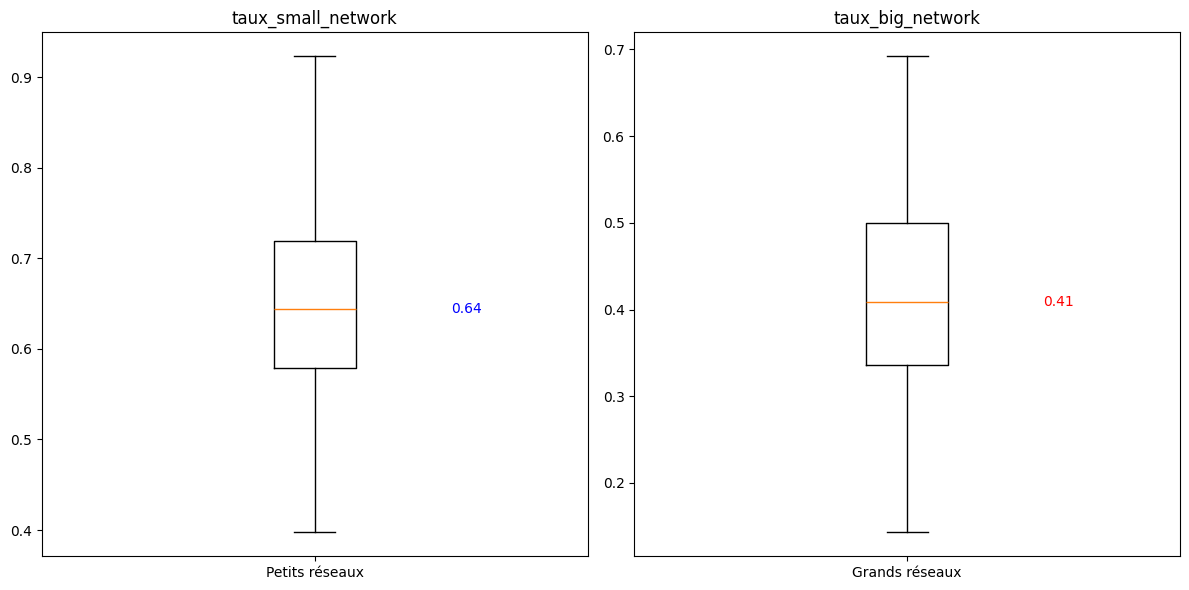

In [10]:
#Boxplot de df_big, df_small et df_total pour l'ensemble des variables 


import matplotlib.pyplot as plt
variables = ["network_length_km", "heat_coverage_MWh", "percentage_heat_coverage", "density_MWh", "nb_buildings_connected"]

#tout afficher dans une même figure sur 2 lignes et 3 colonnes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, var in enumerate(variables):
    axes[i].boxplot(
        [df_big[var], df_small[var], df_total[var]],
        tick_labels=["Grands réseaux", "Petits réseaux", "Total"],
        showfliers=False
    )

    median_big = df_big[var].median()
    median_small = df_small[var].median()
    median_total = df_total[var].median()

    offset = 0.25  # décalage horizontal

    axes[i].text(1 + offset, median_big, f'{median_big:.2f}',
                 va='center', ha='left', color='red')
    axes[i].set_yscale("log")

    axes[i].text(2 + offset, median_small, f'{median_small:.2f}',
                 va='center', ha='left', color='blue')
    axes[i].set_yscale("log")

    axes[i].text(3 + offset, median_total, f'{median_total:.2f}',
                 va='center', ha='left', color='green')
    axes[i].set_yscale("log")


    axes[i].set_title(var)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

#Boxplot des taux 
variables = ["taux_rejet", "taux_selection_global"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()
for i, var in enumerate(variables):
    axes[i].boxplot(
        [df_total[var]],
        tick_labels=["Taux"],
        showfliers=False
    )

    median_value = df_total[var].median()
    offset = 0.25  # décalage horizontal

    axes[i].text(1 + offset, median_value, f'{median_value:.2f}',
                 va='center', ha='left', color='green')

    axes[i].set_title(var)
plt.tight_layout()
plt.show()

variables = ["taux_small_network", "taux_big_network"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()
for i, var in enumerate(variables):
    if var == "taux_small_network":
        axes[i].boxplot([df_small[var]], tick_labels=["Petits réseaux"], showfliers=False)
        median_value = df_small[var].median()
        axes[i].text(1 + offset, median_value, f'{median_value:.2f}', va='center', ha='left', color='blue')
        axes[i].set_title(var)
    else:
        axes[i].boxplot([df_big[var]], tick_labels=["Grands réseaux"], showfliers=False)
        median_value = df_big[var].median()
        axes[i].text(1 + offset, median_value, f'{median_value:.2f}', va='center', ha='left', color='red')
        axes[i].set_title(var)  
plt.tight_layout()
plt.show()



In [11]:
#Données agrégées
total_length_km_big = sum(df_big["network_length_km"])
total_length_km_small = sum(df_small["network_length_km"])
total_length_km = total_length_km_big + total_length_km_small

print(f"Longueur totale des grands réseaux de chaleur (km) : {total_length_km_big:.2f}")
print(f"Longueur totale des petits réseaux de chaleur (km) : {total_length_km_small:.2f}")
print(f"Longueur totale des réseaux de chaleur (km) : {total_length_km:.2f}")
print()
total_heat_coverage_TWh_big = sum(df_big["heat_coverage_MWh"]) / 1000000
total_heat_coverage_TWh_small = sum(df_small["heat_coverage_MWh"]) / 1000000
total_heat_coverage_TWh = total_heat_coverage_TWh_big + total_heat_coverage_TWh_small

print(f"Couverture thermique totale des grands réseaux de chaleur (TWh) : {total_heat_coverage_TWh_big:.2f}")
print(f"Couverture thermique totale des petits réseaux de chaleur (TWh) : {total_heat_coverage_TWh_small:.2f}")
print(f"Couverture thermique totale des réseaux de chaleur (TWh) : {total_heat_coverage_TWh:.2f}")
print()
nb_buildings_connected_big_total = sum(df_big["nb_buildings_connected"])
nb_buildings_connected_small_total = sum(df_small["nb_buildings_connected"])
nb_buildings_connected_total = nb_buildings_connected_big_total + nb_buildings_connected_small_total    

print(f"Nombre total de bâtiments connectés aux grands réseaux de chaleur : {nb_buildings_connected_big_total}")
print(f"Nombre total de bâtiments connectés aux petits réseaux de chaleur : {nb_buildings_connected_small_total}")
print(f"Nombre total de bâtiments connectés aux réseaux de chaleur : {nb_buildings_connected_total}")
print()



Longueur totale des grands réseaux de chaleur (km) : 54115.52
Longueur totale des petits réseaux de chaleur (km) : 2139.41
Longueur totale des réseaux de chaleur (km) : 56254.93

Couverture thermique totale des grands réseaux de chaleur (TWh) : 108.67
Couverture thermique totale des petits réseaux de chaleur (TWh) : 4.07
Couverture thermique totale des réseaux de chaleur (TWh) : 112.74

Nombre total de bâtiments connectés aux grands réseaux de chaleur : 529472
Nombre total de bâtiments connectés aux petits réseaux de chaleur : 21223
Nombre total de bâtiments connectés aux réseaux de chaleur : 550695



## Aggrégation par région

In [12]:
departement_to_region = {
    "01": "Auvergne-Rhône-Alpes",
    "02": "Hauts-de-France",
    "03": "Auvergne-Rhône-Alpes",
    "04": "Provence-Alpes-Côte d’Azur",
    "05": "Provence-Alpes-Côte d’Azur",
    "06": "Provence-Alpes-Côte d’Azur",
    "07": "Auvergne-Rhône-Alpes",
    "08": "Grand Est",
    "09": "Occitanie",
    "10": "Grand Est",
    "11": "Occitanie",
    "12": "Occitanie",
    "13": "Provence-Alpes-Côte d’Azur",
    "14": "Normandie",
    "15": "Auvergne-Rhône-Alpes",
    "16": "Nouvelle-Aquitaine",
    "17": "Nouvelle-Aquitaine",
    "18": "Centre-Val de Loire",
    "19": "Nouvelle-Aquitaine",
    "2A": "Corse",
    "2B": "Corse",
    "21": "Bourgogne-Franche-Comté",
    "22": "Bretagne",
    "23": "Nouvelle-Aquitaine",
    "24": "Nouvelle-Aquitaine",
    "25": "Bourgogne-Franche-Comté",
    "26": "Auvergne-Rhône-Alpes",
    "27": "Normandie",
    "28": "Centre-Val de Loire",
    "29": "Bretagne",
    "30": "Occitanie",
    "31": "Occitanie",
    "32": "Occitanie",
    "33": "Nouvelle-Aquitaine",
    "34": "Occitanie",
    "35": "Bretagne",
    "36": "Centre-Val de Loire",
    "37": "Centre-Val de Loire",
    "38": "Auvergne-Rhône-Alpes",
    "39": "Bourgogne-Franche-Comté",
    "40": "Nouvelle-Aquitaine",
    "41": "Centre-Val de Loire",
    "42": "Auvergne-Rhône-Alpes",
    "43": "Auvergne-Rhône-Alpes",
    "44": "Pays de la Loire",
    "45": "Centre-Val de Loire",
    "46": "Occitanie",
    "47": "Nouvelle-Aquitaine",
    "48": "Occitanie",
    "49": "Pays de la Loire",
    "50": "Normandie",
    "51": "Grand Est",
    "52": "Grand Est",
    "53": "Pays de la Loire",
    "54": "Grand Est",
    "55": "Grand Est",
    "56": "Bretagne",
    "57": "Grand Est",
    "58": "Bourgogne-Franche-Comté",
    "59": "Hauts-de-France",
    "60": "Hauts-de-France",
    "61": "Normandie",
    "62": "Hauts-de-France",
    "63": "Auvergne-Rhône-Alpes",
    "64": "Nouvelle-Aquitaine",
    "65": "Occitanie",
    "66": "Occitanie",
    "67": "Grand Est",
    "68": "Grand Est",
    "69": "Auvergne-Rhône-Alpes",
    "70": "Bourgogne-Franche-Comté",
    "71": "Bourgogne-Franche-Comté",
    "72": "Pays de la Loire",
    "73": "Auvergne-Rhône-Alpes",
    "74": "Auvergne-Rhône-Alpes",
    "75": "Île-de-France",
    "76": "Normandie",
    "77": "Île-de-France",
    "78": "Île-de-France",
    "79": "Nouvelle-Aquitaine",
    "80": "Hauts-de-France",
    "81": "Occitanie",
    "82": "Occitanie",
    "83": "Provence-Alpes-Côte d’Azur",
    "84": "Provence-Alpes-Côte d’Azur",
    "85": "Pays de la Loire",
    "86": "Nouvelle-Aquitaine",
    "87": "Nouvelle-Aquitaine",
    "88": "Grand Est",
    "89": "Bourgogne-Franche-Comté",
    "90": "Bourgogne-Franche-Comté",
    "91": "Île-de-France",
    "92": "Île-de-France",
    "93": "Île-de-France",
    "94": "Île-de-France",
    "95": "Île-de-France",
}


In [13]:
for dep in df_big["departement"].unique():
    df_big.loc[df_big["departement"]==dep, "region"] = departement_to_region[dep]

for dep in df_small["departement"].unique():
    df_small.loc[df_small["departement"]==dep, "region"] = departement_to_region[dep]   

for dep in df_total["departement"].unique():
    df_total.loc[df_total["departement"]==dep, "region"] = departement_to_region[dep]

In [14]:
#Résultats aggrégés par région
df_big_region = df_big.groupby("region").agg({
    "network_length_km": "sum",
    "heat_coverage_MWh": "sum",
    "percentage_heat_coverage": "mean",
    "density_MWh": "mean",
    "nb_buildings_connected": "sum",
    "taux_big_network": "mean"
}).reset_index()    

df_small_region = df_small.groupby("region").agg({
    "network_length_km": "sum",
    "heat_coverage_MWh": "sum",
    "percentage_heat_coverage": "mean",
    "density_MWh": "mean",
    "nb_buildings_connected": "sum",
    "taux_small_network": "mean"
}).reset_index()

df_total_region = df_total.groupby("region").agg({
    "network_length_km": "sum",
    "heat_coverage_MWh": "sum",
    "percentage_heat_coverage": "mean",
    "density_MWh": "mean",  
    "nb_buildings_connected": "sum",
    "taux_rejet": "mean",
    "taux_selection_global": "mean"
}).reset_index()

In [15]:
#Pourcentage de la demande en chaleure totale par région
df_total_region["percentage_heat_coverage_national"] = (df_total_region["heat_coverage_MWh"] / df_total_region["heat_coverage_MWh"].sum()) * 100
#Pourcentage du kilométrage total de réseau de chaleur par région
df_total_region["percentage_network_length_national"] = (df_total_region["network_length_km"] / df_total_region["network_length_km"].sum()) * 100

df_total_region["heat_coverage_TWh"]= df_total_region["heat_coverage_MWh"] / 1000000

In [16]:
print(df_total_region)

                        region  network_length_km  heat_coverage_MWh  \
0         Auvergne-Rhône-Alpes            9835.62        19738410.00   
1      Bourgogne-Franche-Comté            2937.61         5262982.00   
2                     Bretagne            2218.70         3732195.00   
3          Centre-Val de Loire            2044.49         3382280.00   
4                        Corse             136.82          210319.00   
5                    Grand Est            6737.50        12301310.00   
6              Hauts-de-France            4875.43         8451486.00   
7                    Normandie            3042.79         5211752.00   
8           Nouvelle-Aquitaine            3052.79         4747907.00   
9                    Occitanie            3265.93         5107966.00   
10            Pays de la Loire            2562.39         4246019.00   
11  Provence-Alpes-Côte d’Azur            2970.30         4866386.00   
12               Île-de-France           12574.56        3547675

In [17]:

row=["Provence-Alpes-Côte d’Azur - Corse", 2970.3+136.82,210319+4866386, -1,-1, 1608+28333,-1,-1,-1,-1,0.21+4.87]
df_total_region.loc[len(df_total_region)] = row

In [18]:
#Affichage du nombre de réseaux de chaleur par région
nb_reseaux_region = df_total.groupby("region").size().reset_index(name="nb_reseaux")
print(nb_reseaux_region.sort_values(by="nb_reseaux", ascending=False))  
print()
#Affichage du nombre de bâtiments connectés par région
buildings_connected_region = df_total.groupby("region")["nb_buildings_connected"].sum().reset_index(name="nb_buildings_connected")
print(buildings_connected_region.sort_values(by="nb_buildings_connected", ascending=False))
print()
#Affichage de la couverture thermique totale par région
df_total["heat_coverage_TWh"] = df_total["heat_coverage_MWh"] / 1000000

heat_coverage_region = df_total.groupby("region")["heat_coverage_TWh"].sum().reset_index(name="heat_coverage_TWh")
#Affichage de la longueur totale des réseaux de chaleur par région
network_length_region = df_total.groupby("region")["network_length_km"].sum().reset_index(name="network_length_km")
heat_coverage_percentage = heat_coverage_region.copy()

total_heat = heat_coverage_percentage["heat_coverage_TWh"].sum()

heat_coverage_percentage["heat_coverage_pct"] = (
    heat_coverage_percentage["heat_coverage_TWh"] / total_heat * 100
)

print(
    heat_coverage_percentage
    .sort_values(by="heat_coverage_pct", ascending=False)
)
print()


network_length_percentage = network_length_region.copy()

total_network_length = network_length_percentage["network_length_km"].sum()

network_length_percentage["network_length_pct"] = (
    network_length_percentage["network_length_km"] / total_network_length * 100
)

print(
    network_length_percentage
    .sort_values(by="network_length_pct", ascending=False)
)


                        region  nb_reseaux
0         Auvergne-Rhône-Alpes        1559
5                    Grand Est        1375
6              Hauts-de-France         760
1      Bourgogne-Franche-Comté         731
8           Nouvelle-Aquitaine         722
9                    Occitanie         716
12               Île-de-France         611
7                    Normandie         388
2                     Bretagne         363
11  Provence-Alpes-Côte d’Azur         362
3          Centre-Val de Loire         345
10            Pays de la Loire         336
4                        Corse          27

                        region  nb_buildings_connected
12               Île-de-France                  159281
0         Auvergne-Rhône-Alpes                   98627
5                    Grand Est                   66691
6              Hauts-de-France                   38439
11  Provence-Alpes-Côte d’Azur                   28333
9                    Occitanie                   27755
1      Bourg

In [19]:
# Calcul du nombre de réseaux par région
nb_reseaux = df_total.groupby("region").size()

# Initialiser la colonne 'nb_reseaux' avec 0
df_total_region["nb_reseaux"] = 0

# Mettre à jour les régions présentes dans nb_reseaux
df_total_region.loc[df_total_region["region"] != "Provence-Alpes-Côte d’Azur - Corse", "nb_reseaux"] = df_total_region.loc[
    df_total_region["region"] != "Provence-Alpes-Côte d’Azur - Corse", "region"
].map(nb_reseaux)

df_total_region.loc[df_total_region["region"] == "Provence-Alpes-Côte d’Azur - Corse", "nb_reseaux"] =df_total_region.loc[df_total_region["region"] == "Provence-Alpes-Côte d’Azur", "nb_reseaux"].values[0] + df_total_region.loc[df_total_region["region"] == "Corse", "nb_reseaux"].values[0]


In [20]:
regions_reel={"Hauts-de-France" : [1.575,58,573], "Île-de-France":[10.618,136,2285], "Normandie":[1.473,56,404], "Grand-Est":[2.830,135,923], "Bretagne" : [0.790,48,224], "Pays de la Loire": [0.979,36,334], "Centre-Val de Loire":[0.785,38,235], "Bourgogne-Franche-Comté":[1.138,80,461], "Nouvelle-Aquitaine":[1.003,91,429], "Auvergne-Rhône-Alpes":[4.008,214,1168],"Occitanie":[0.779,66,311], "Provence-Alpes-Côte d’Azur - Corse" : [0.450,42,149], "Grand Est": [2.83,135,923], "Corse": [0.136,6,33], "Provence-Alpes-Côte d’Azur": [0.450,36,116]}
df_regions_reel=pd.DataFrame(regions_reel).T.reset_index()
df_regions_reel.columns=["region", "heat_coverage_TWh", "nb_reseaux", "network_length_km"]


In [21]:
df_total_region_modif=df_total_region[(df_total_region["region"]!="Provence-Alpes-Côte d’Azur") & (df_total_region["region"]!="Corse")]
df_comparaison = df_total_region_modif.merge(df_regions_reel, on="region", how="left", suffixes=("_estimation", "_reel"))
df_comparaison["heat_coverage_ratio"] = df_comparaison["heat_coverage_TWh_estimation"] / df_comparaison["heat_coverage_TWh_reel"]
df_comparaison["nb_reseaux_ratio"] = df_comparaison["nb_reseaux_estimation"] / df_comparaison["nb_reseaux_reel"]
df_comparaison["network_length_ratio"] = df_comparaison["network_length_km_estimation"] / df_comparaison["network_length_km_reel"]
print(df_comparaison[["region", "heat_coverage_ratio", "nb_reseaux_ratio", "network_length_ratio"]])

                                region  heat_coverage_ratio  nb_reseaux_ratio  \
0                 Auvergne-Rhône-Alpes                 4.92              7.29   
1              Bourgogne-Franche-Comté                 4.62              9.14   
2                             Bretagne                 4.72              7.56   
3                  Centre-Val de Loire                 4.31              9.08   
4                            Grand Est                 4.35             10.19   
5                      Hauts-de-France                 5.37             13.10   
6                            Normandie                 3.54              6.93   
7                   Nouvelle-Aquitaine                 4.73              7.93   
8                            Occitanie                 6.56             10.85   
9                     Pays de la Loire                 4.34              9.33   
10                       Île-de-France                 3.34              4.49   
11  Provence-Alpes-Côte d’Az

In [22]:
print(df_comparaison.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]))

       network_length_km_estimation  heat_coverage_MWh  \
count                         12.00              12.00   
mean                        4687.91         9394647.50   
std                         3350.73         9460483.34   
min                         2044.49         3382280.00   
10%                         2253.07         3783577.40   
25%                         2843.80         4622435.00   
50%                         3079.95         5159859.00   
75%                         5340.95         9413942.00   
90%                         9525.81        18994700.00   
max                        12574.56        35476758.00   

       percentage_heat_coverage  density_MWh  nb_buildings_connected  \
count                     12.00        12.00                   12.00   
mean                      42.75         2.06                45891.25   
std                       16.74         0.98                42985.52   
min                       -1.00        -1.00                16039.00   
1

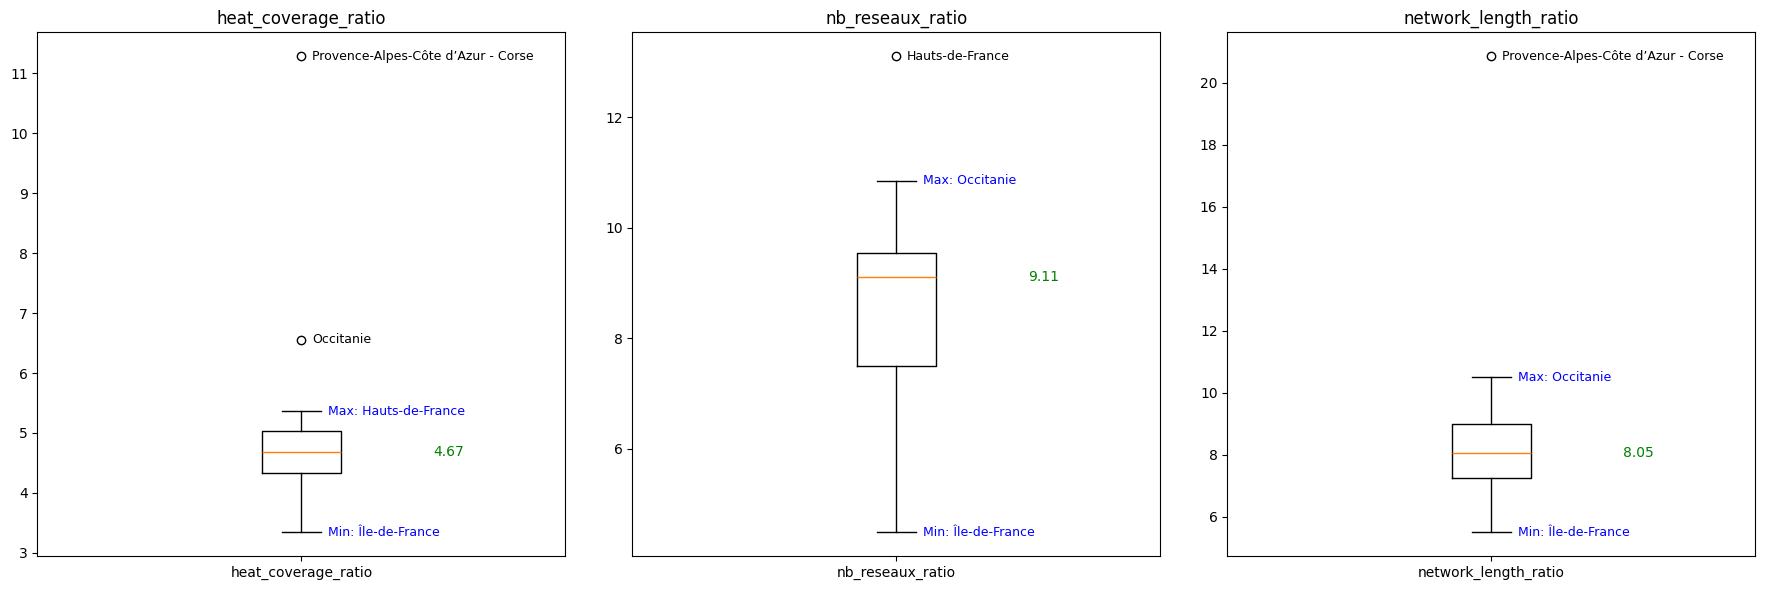

In [23]:
#Boxplot des ratios de comparaison
variables = ["heat_coverage_ratio", "nb_reseaux_ratio", "network_length_ratio"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()
for i, var in enumerate(variables):
    axes[i].boxplot(
        df_comparaison[var],
        tick_labels=[var],
        showfliers=True
    )

    median_value = df_comparaison[var].median()
    offset = 0.25  # décalage horizontal

    axes[i].text(1 + offset, median_value, f'{median_value:.2f}',
                 va='center', ha='left', color='green')

    axes[i].set_title(var)
    
    q1 = df_comparaison[var].quantile(0.25)
    q3 = df_comparaison[var].quantile(0.75)


    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    non_outliers = df_comparaison[
        (df_comparaison[var] >= lower_bound) & (df_comparaison[var] <= upper_bound)
    ]

    min_row = non_outliers.loc[non_outliers[var].idxmin()]
    max_row = non_outliers.loc[non_outliers[var].idxmax()]

    axes[i].text(
        1.05,
        min_row[var],
        f'Min: {min_row["region"]}',
        fontsize=9,
        va='center',
        ha='left',
        color='blue'
    )

    axes[i].text(
        1.05,
        max_row[var],
        f'Max: {max_row["region"]}',
        fontsize=9,
        va='center',
        ha='left',
        color='blue'
    )

    outliers = df_comparaison[
        (df_comparaison[var] < lower_bound) | (df_comparaison[var] > upper_bound)
    ]

    # --- Annotation des outliers
    for _, row in outliers.iterrows():
        axes[i].text(
            1.02,                      
            row[var],
            row["region"],              
            fontsize=9,
            va='center',
            ha='left'
        )

    axes[i].set_title(var)
plt.tight_layout()
plt.show()

In [24]:
#Afficher un tableau comparatif des régions avec les valeurs d'estimation, de réel et de ratio pour la couverture thermique
comparaison_table = df_comparaison[["region", "heat_coverage_TWh_estimation", "heat_coverage_TWh_reel", "heat_coverage_ratio"]]
print(comparaison_table.sort_values(by="heat_coverage_ratio", ascending=False))

                                region  heat_coverage_TWh_estimation  \
11  Provence-Alpes-Côte d’Azur - Corse                          5.08   
8                            Occitanie                          5.11   
5                      Hauts-de-France                          8.45   
0                 Auvergne-Rhône-Alpes                         19.74   
7                   Nouvelle-Aquitaine                          4.75   
2                             Bretagne                          3.73   
1              Bourgogne-Franche-Comté                          5.26   
4                            Grand Est                         12.30   
9                     Pays de la Loire                          4.25   
3                  Centre-Val de Loire                          3.38   
6                            Normandie                          5.21   
10                       Île-de-France                         35.48   

    heat_coverage_TWh_reel  heat_coverage_ratio  
11           

## Régression linéaire

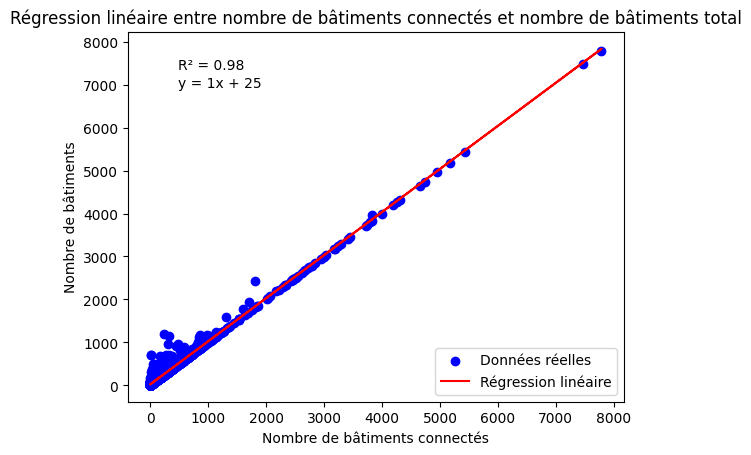

In [25]:
#Régression linéaire
from sklearn.linear_model import LinearRegression
X = df_total["nb_buildings_connected"]
y=df_total["nb_buildings"]
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))
y_pred = model.predict(X.values.reshape(-1, 1)) 

#afficher le coefficient de détermination R² sur le graphe
r2_score = model.score(X.values.reshape(-1, 1), y.values.reshape(-1, 1))
plt.text(0.1, 0.9, f"R² = {r2_score:.2f}", transform=plt.gca().transAxes)

#afficher les coefficients de la régression linéaire sur le graphe
coef = model.coef_[0][0]
intercept = model.intercept_[0]
plt.text(0.1, 0.85, f"y = {coef:.0f}x + {intercept:.0f}", transform=plt.gca().transAxes)


plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, y_pred, color='red', label='Régression linéaire')
plt.xlabel('Nombre de bâtiments connectés')
plt.ylabel('Nombre de bâtiments')
plt.title('Régression linéaire entre nombre de bâtiments connectés et nombre de bâtiments total')
plt.legend()
plt.show()

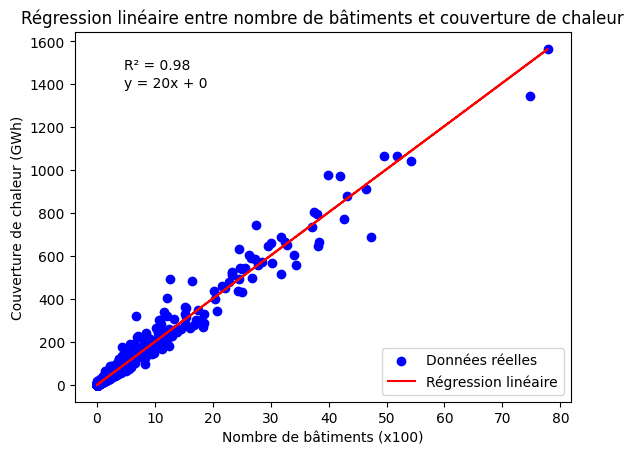

In [23]:
#Régression linéaire
from sklearn.linear_model import LinearRegression
X = df_total["nb_buildings_connected"]/100
y=df_total["heat_coverage_MWh"]/1000

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))
y_pred = model.predict(X.values.reshape(-1, 1)) 

#afficher le coefficient de détermination R² sur le graphe
r2_score = model.score(X.values.reshape(-1, 1), y.values.reshape(-1, 1))
plt.text(0.1, 0.9, f"R² = {r2_score:.2f}", transform=plt.gca().transAxes)

#afficher les coefficients de la régression linéaire sur le graphe
coef = model.coef_[0][0]
intercept = model.intercept_[0]
plt.text(0.1, 0.85, f"y = {coef:.0f}x + {intercept:.0f}", transform=plt.gca().transAxes)

plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, y_pred, color='red', label='Régression linéaire')
plt.xlabel('Nombre de bâtiments (x100)')
plt.ylabel('Couverture de chaleur (GWh)')
plt.title('Régression linéaire entre nombre de bâtiments et couverture de chaleur')
plt.legend()
plt.show()

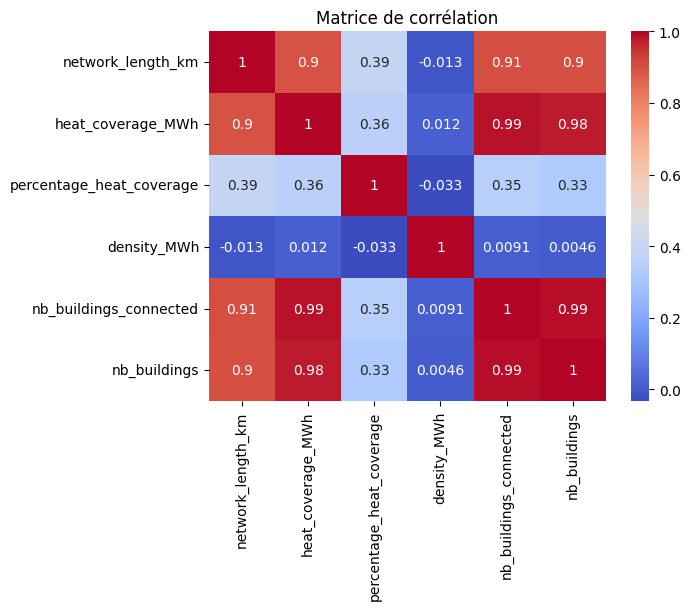

In [27]:
#Matrice de corrélation
import seaborn as sns
corr_matrix = df_total[["network_length_km", "heat_coverage_MWh", "percentage_heat_coverage", "density_MWh", "nb_buildings_connected", "nb_buildings"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

## Comparaison avec les modèles précédents 

# Analyse par département

On construit df_dep_global : les différents taux de sélection/ rejet des communes par département. 

In [11]:
df_dep_global = pd.DataFrame({
    "taux_selection_global": taux_selection_global,
    "taux_rejet": taux_rejet,
    "taux_small_network": taux_small_network,
    "taux_big_network": taux_big_network,
    "nb_grands_reseaux": {k: nb_reseaux[k] - nb_petits_reseaux.get(k, 0) for k in nb_reseaux},
    "nb_petits_reseaux": nb_petits_reseaux,
    "nb_communes": nb_communes
})
df_dep_global.describe()

print(df_dep_global)


    taux_selection_global  taux_rejet  taux_small_network  taux_big_network  \
01                   0.38        0.62                0.64              0.36   
02                   0.12        0.88                0.62              0.38   
03                   0.17        0.83                0.69              0.31   
04                   0.20        0.80                0.70              0.30   
05                   0.33        0.67                0.55              0.45   
..                    ...         ...                 ...               ...   
91                   0.55        0.45                0.32              0.68   
92                   1.00        0.00                0.00              1.00   
93                   1.00        0.00                0.03              0.97   
94                   0.98        0.02                0.02              0.98   
95                   0.49        0.51                0.31              0.69   

    nb_grands_reseaux  nb_petits_reseaux  nb_commun

On construit df_final_big et df_final_small = les moyennes des données des réseaux de chaleur par département.

In [7]:
df_grouped_big = df_big.groupby("departement").agg({
    "network_length_km": "mean",
    "density_MWh": "mean",
    "heat_coverage_MWh": "mean",
    "percentage_heat_coverage": "mean",
    "nb_buildings_connected": "mean"
})

df_grouped_small = df_small.groupby("departement").agg({
    "network_length_km": "mean",
    "density_MWh": "mean",
    "heat_coverage_MWh": "mean",
    "percentage_heat_coverage": "mean",
    "nb_buildings_connected": "mean"

})

df_final_big=df_grouped_big.merge(df_dep_global["taux_big_network"], left_index=True, right_index=True)

df_final_small=df_grouped_small.merge(df_dep_global["taux_small_network"], left_index=True, right_index=True)

df_final_big["departement"]=df_final_big.index
df_final_small["departement"]=df_final_small.index

In [8]:
print(df_final_small)

    network_length_km  density_MWh  heat_coverage_MWh  \
01           0.362803     2.557801         684.484211   
02           0.492988     8.653555        1181.793103   
03           0.390307     2.668848         795.189189   
04           0.411106     2.827556         737.714286   
05           0.447672     3.028278         834.068966   
..                ...          ...                ...   
90           0.472852     2.268057         815.166667   
91           0.632710     2.057347        1189.264706   
93           1.253125     1.639102        2054.000000   
94           0.647009     1.670766        1081.000000   
95           0.646955     1.999291        1190.035714   

    percentage_heat_coverage  nb_buildings_connected  taux_small_network  \
01                 31.313202                4.305263            0.641892   
02                 39.725705                4.379310            0.623656   
03                 32.504093                3.621622            0.685185   
04         

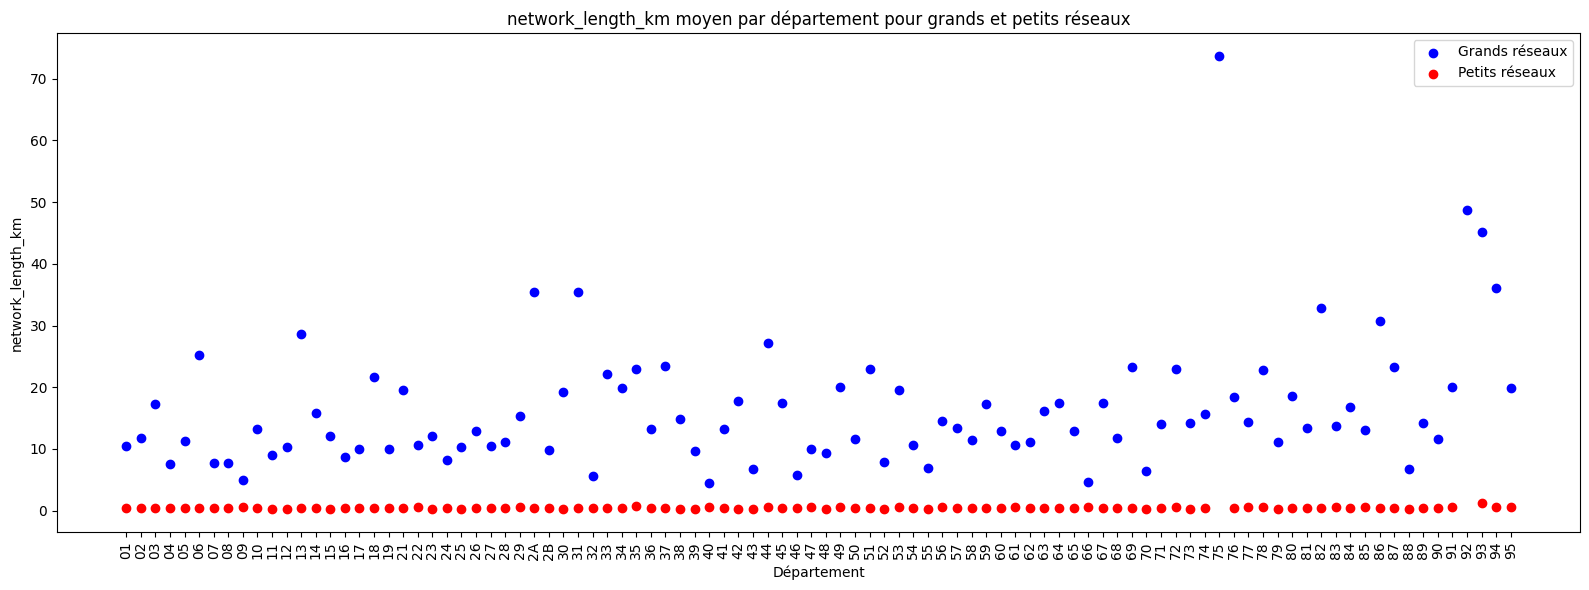

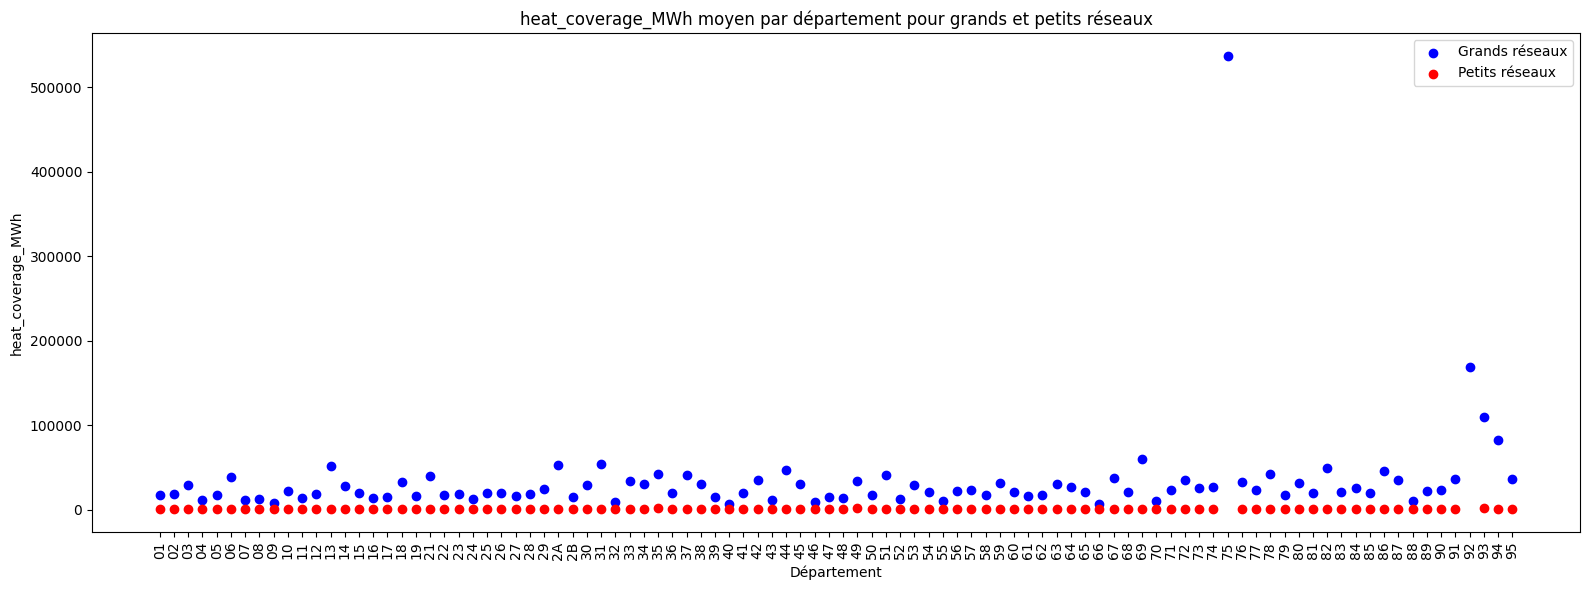

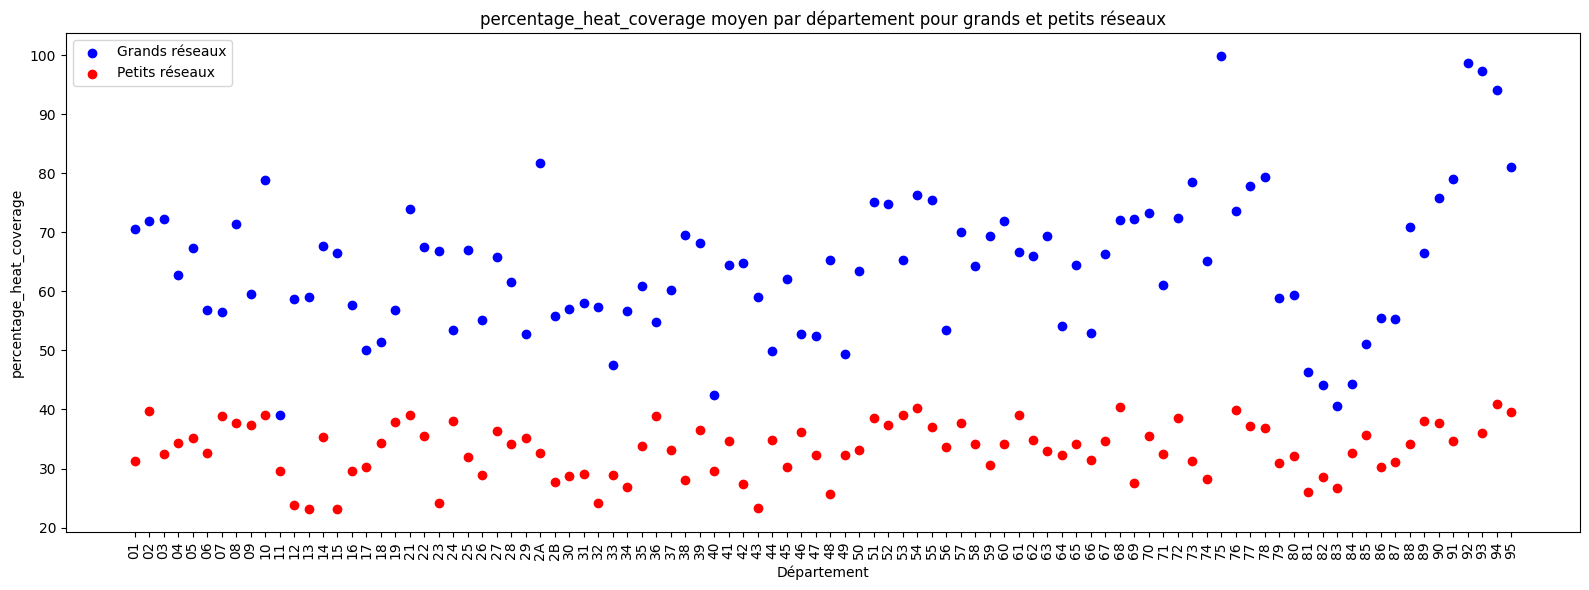

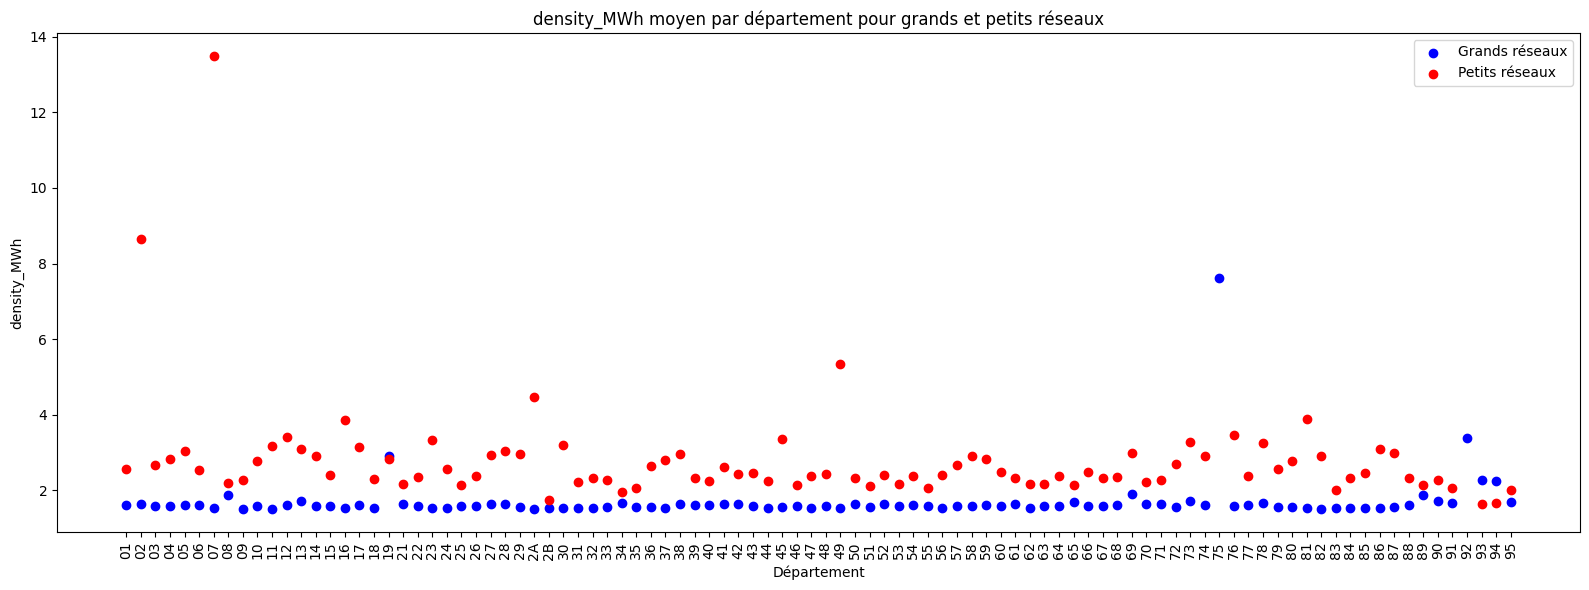

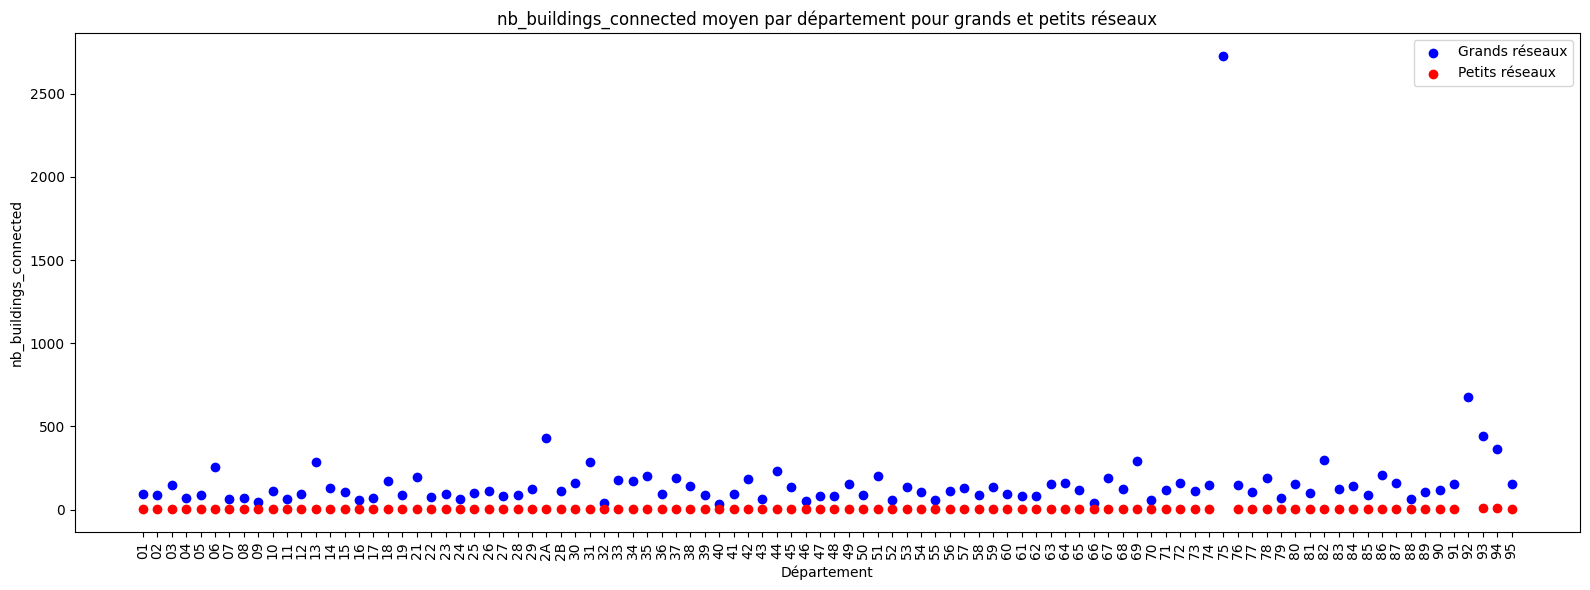

In [9]:

variables = [
    "network_length_km",
    "heat_coverage_MWh",
    "percentage_heat_coverage",
    "density_MWh",
    "nb_buildings_connected"
]
#Nuage de point en fonction des départements pour chaque variable
for var in variables:
    plt.figure(figsize=(16, 6))
    plt.scatter(df_final_big["departement"], df_final_big[var], color='blue', label='Grands réseaux')
    plt.scatter(df_final_small["departement"], df_final_small[var], color='red', label='Petits réseaux')
    plt.xlabel("Département")
    plt.ylabel(var)
    plt.title(f"{var} moyen par département pour grands et petits réseaux")
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


## Ajout de la zone climatique

La zone climatique est censée avoir un impact sur la demande en chaleur des départements.

In [10]:
zone_climatique = {
    # H1 – climat froid
    "01":"H1", "02":"H1", "03":"H1", "05":"H1", "08":"H1", "10":"H1", "14":"H1", "15":"H1",
    "19":"H1", "21":"H1", "23":"H1", "25":"H1", "27":"H1", "28":"H1", "38":"H1",
    "39":"H1", "42":"H1", "43":"H1", "45":"H1", "51":"H1", "52":"H1",
    "54":"H1", "55":"H1", "57":"H1", "58":"H1", "59":"H1", "60":"H1", "61":"H1",
    "62":"H1", "63":"H1", "67":"H1", "68":"H1", "69":"H1", "70":"H1", "71":"H1",
    "73":"H1", "74":"H1", "75":"H1", "76":"H1", "77" : "H1", "78" : "H1", "80":"H1", "87":"H1", "88":"H1", "89":"H1",
    "90":"H1", "91":"H1", "92":"H1", "93":"H1", "94":"H1", "95":"H1",

    # H2 – climat tempéré
    "04":"H2", "07":"H2", "09":"H2", "12":"H2", "16":"H2",
    "17":"H2", "18":"H2", "22":"H2", "24":"H2", "26":"H2", "29":"H2", "31":"H2",
    "32":"H2", "33":"H2", "35":"H2", "36":"H2", "37":"H2", "40":"H2", "41":"H2",
    "44":"H2", "46":"H2", "47":"H2", "48" : "H2","49":"H2", "50":"H2", "53":"H2", "56":"H2",
    "64":"H2", "65":"H2", "72":"H2", "79":"H2", "81":"H2", "82":"H2", "84" : "H2", "85":"H2",
    "86":"H2",

    # H3 – climat chaud
    "06" : "H3", "11": "H3", "13":"H3", "2A":"H3", "2B":"H3", "30":"H3", "34":"H3", "66":"H3", "83":"H3"
}

On trie par zone climatique pour voir s'il y a une influcence visuelle sur les graphes.

In [11]:
df_big["zone_climatique"] = df_big["departement"].map(zone_climatique)
#Trier par zone climatique
df_big=df_big.sort_values("zone_climatique").reset_index(drop=True)
df_small["zone_climatique"] = df_small["departement"].map(zone_climatique)
df_small=df_small.sort_values("zone_climatique")



df_final_big["zone_climatique"] = df_final_big["departement"].map(zone_climatique)
df_final_big=df_final_big.sort_values("zone_climatique").reset_index(drop=True) 


df_final_small["zone_climatique"] = df_final_small["departement"].map(zone_climatique)
df_final_small=df_final_small.sort_values("zone_climatique").reset_index(drop=True) 
print(df_final_small)


    network_length_km  density_MWh  heat_coverage_MWh  \
0            0.362803     2.557801         684.484211   
1            0.497603     2.175199         900.495050   
2            0.535185     2.323265         945.290323   
3            0.460136     2.476959         854.712329   
4            0.425852     2.821607         793.011236   
..                ...          ...                ...   
89           0.524018     2.005065         897.052632   
90           0.455080     3.086157         852.793103   
91           0.440638     2.546886         759.045455   
92           0.451258     1.963207         816.619048   
93           0.540186     2.475128        1009.482759   

    percentage_heat_coverage  nb_buildings_connected  taux_small_network  \
0                  31.313202                4.305263            0.641892   
1                  34.813708                4.564356            0.577143   
2                  38.986433                4.193548            0.620000   
3          

   departement zone_climatique
0           01              H1
1           63              H1
2           62              H1
3           61              H1
4           60              H1
..         ...             ...
91          2A              H3
92          06              H3
93          34              H3
94          30              H3
95          66              H3

[96 rows x 2 columns]


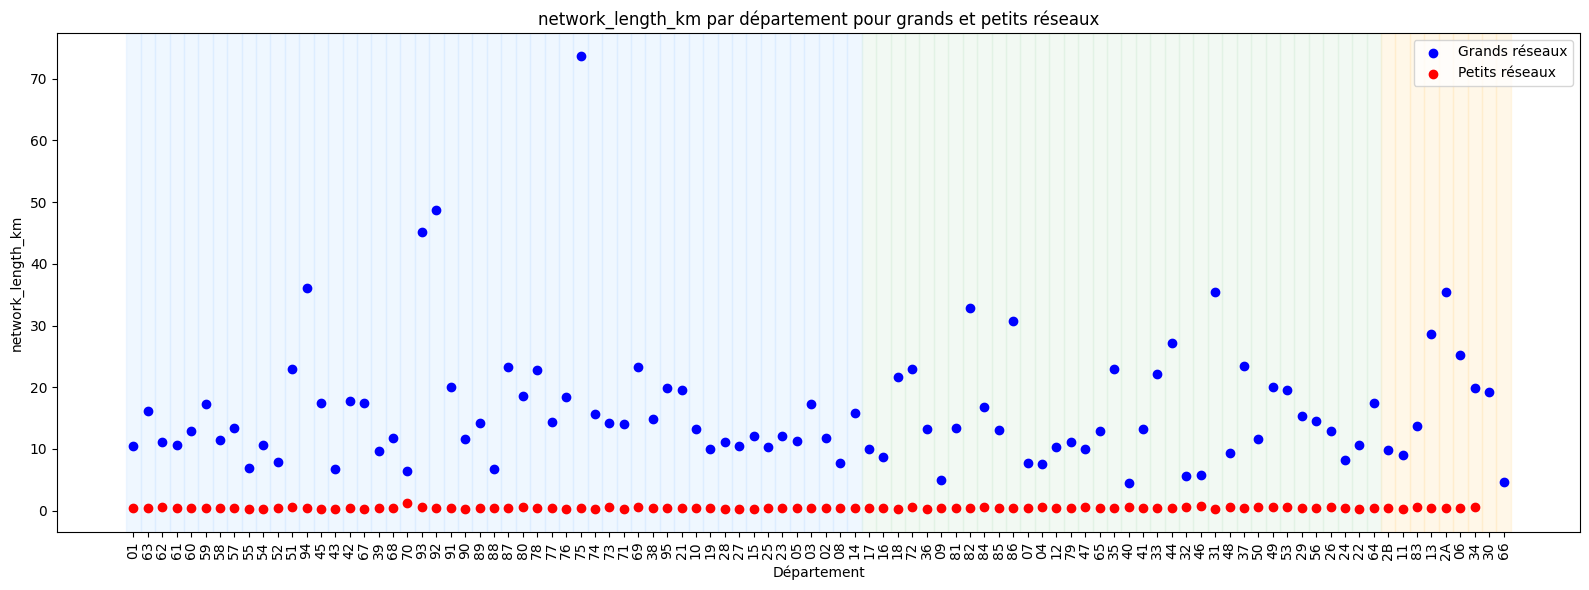

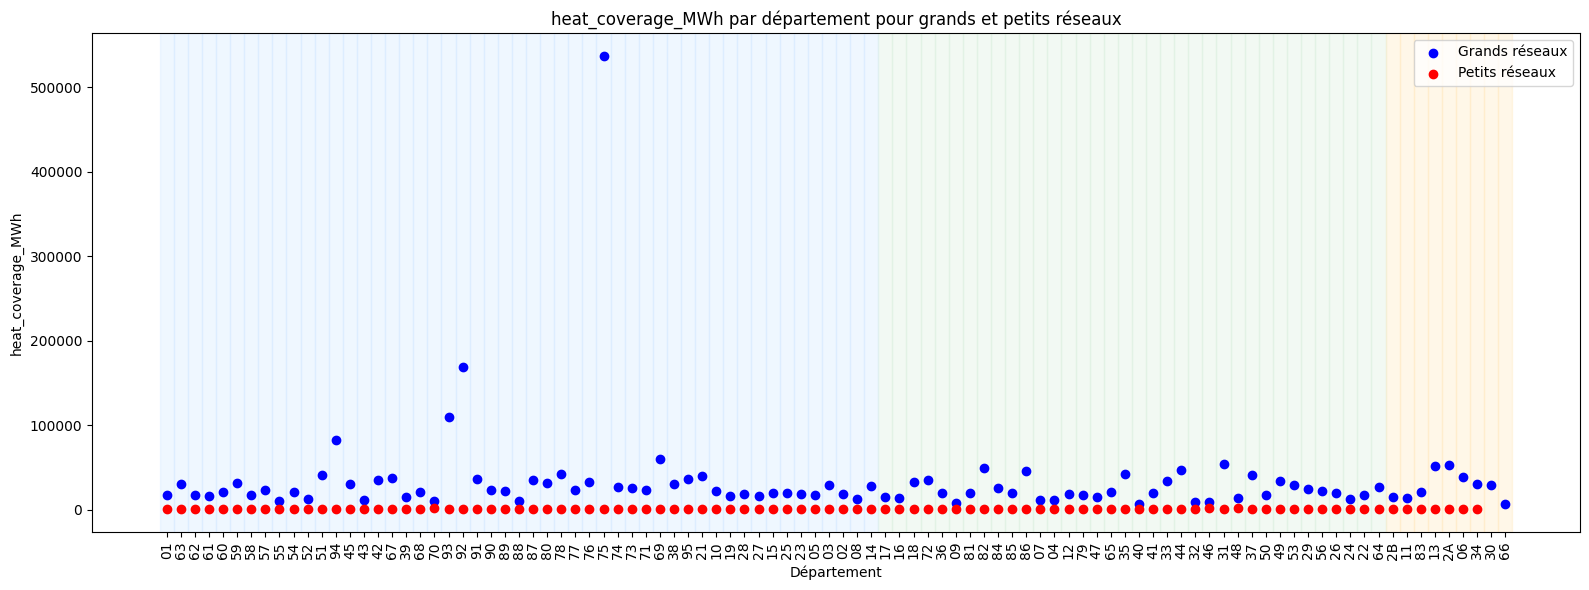

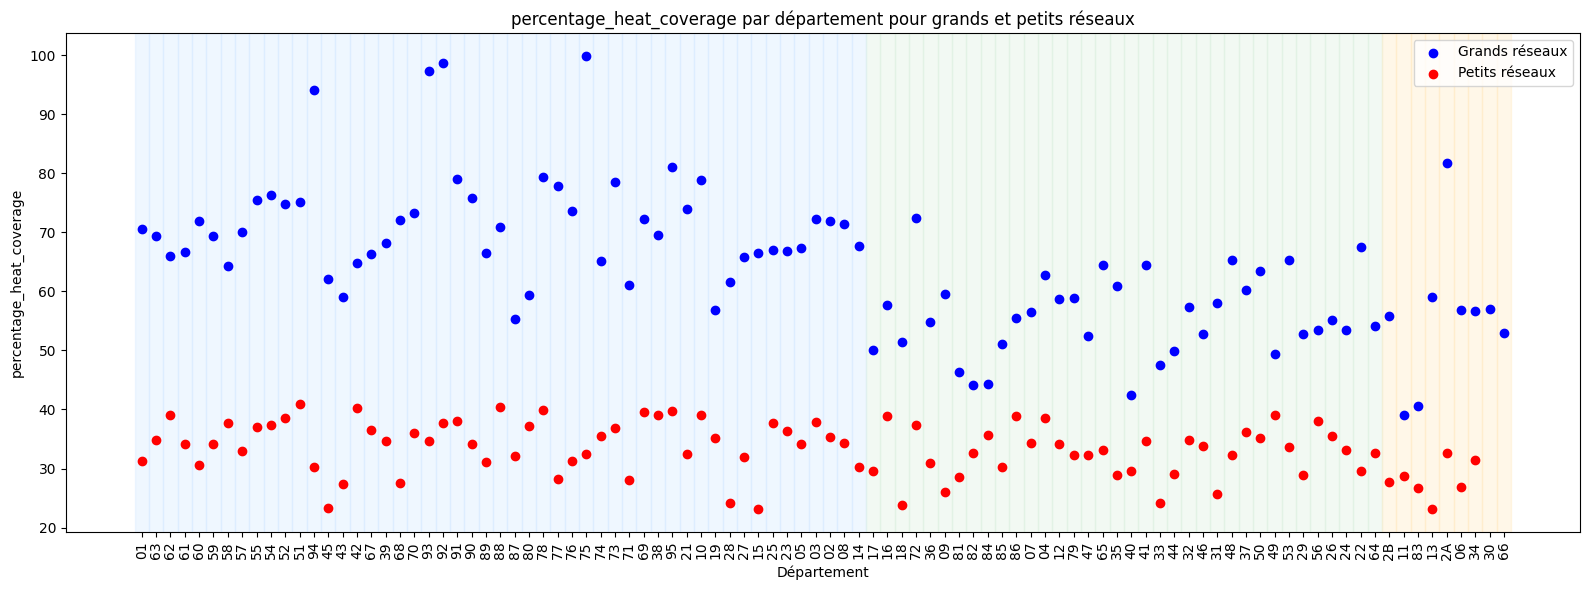

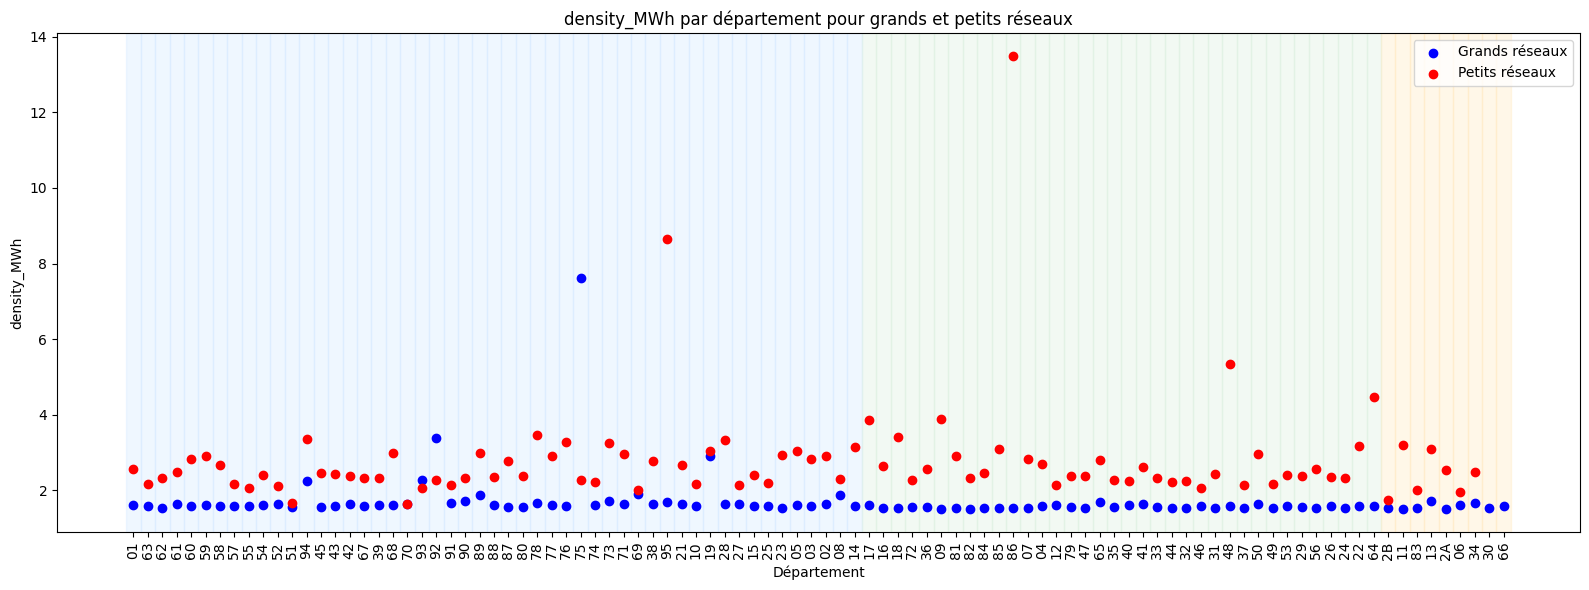

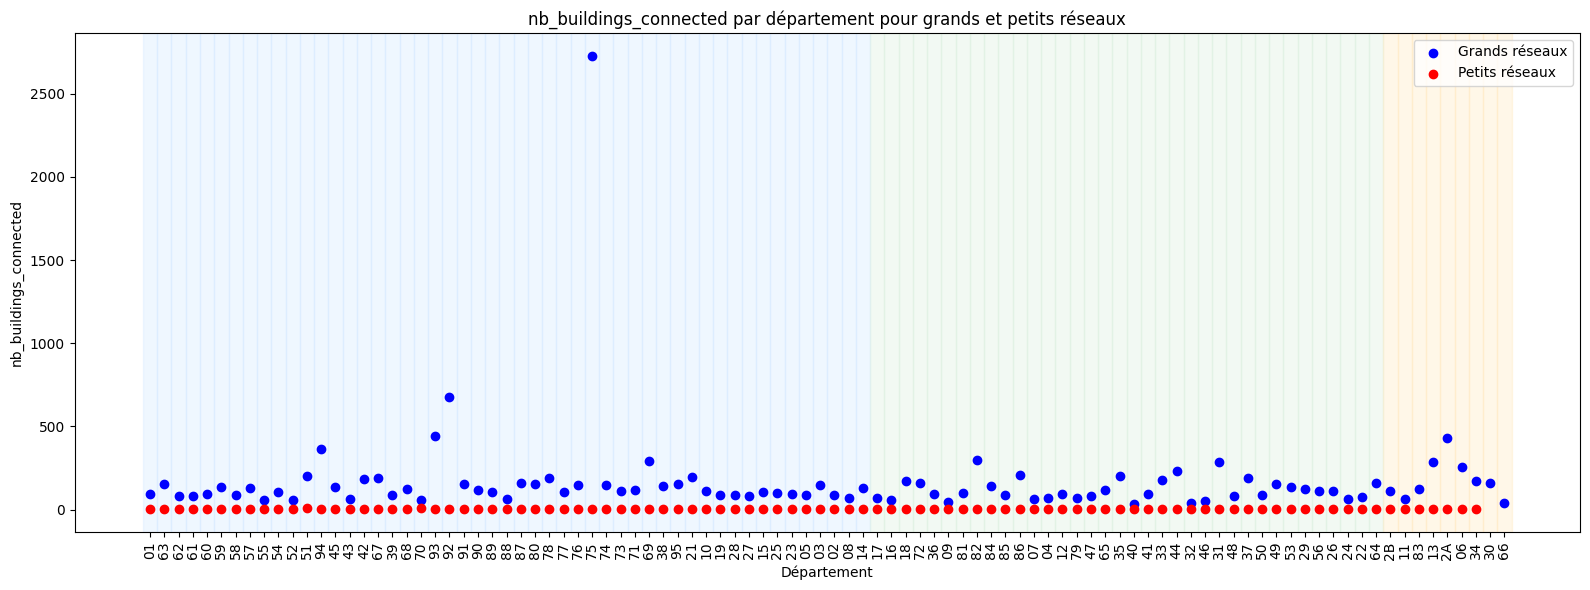

In [12]:
import matplotlib.pyplot as plt

# Palette pour les zones climatiques
zone_colors = {
    "H1": "#cce5ff",  # bleu clair
    "H2": "#d4edda",  # vert clair
    "H3": "#ffe5b4"   # orange clair
}

variables = [
    "network_length_km",
    "heat_coverage_MWh",
    "percentage_heat_coverage",
    "density_MWh",
    "nb_buildings_connected"
]



# Liste des départements et zone pour les couleurs
departements = df_final_big["departement"].unique()
zone_bounds = df_final_big[["departement", "zone_climatique"]].drop_duplicates().reset_index(drop=True)
print(zone_bounds)

# Boucle sur les variables
for var in variables:
    fig, ax = plt.subplots(figsize=(16, 6))

    # Fond coloré par zone climatique
    for i, row in zone_bounds.iterrows():
        zone = row["zone_climatique"]
        ax.axvspan(i - 0.5, i + 0.5, color=zone_colors[zone], alpha=0.3)
    
    #Légende pour les zones climatiques
    handles = [plt.Rectangle((0,0),1,1, color=zone_colors[zone], alpha=0.3) for zone in zone_colors]
    labels = [f"Zone {zone}" for zone in zone_colors]
    ax.legend(handles, labels, title="Zones climatiques", loc='upper left')

    # Scatter plots
    ax.scatter(range(len(df_final_big)), df_final_big[var], color='blue', label='Grands réseaux')
    ax.scatter(range(len(df_final_small)), df_final_small[var], color='red', label='Petits réseaux')

    ax.set_xticks(range(len(departements)))
    ax.set_xticklabels(departements, rotation=90)
    ax.set_xlabel("Département")
    ax.set_ylabel(var)
    ax.set_title(f"{var} par département pour grands et petits réseaux")
    ax.legend()
    plt.tight_layout()
    plt.show()


On a ensuite df_final_zone_big/small avec les moyennes et médianes de toutes les données par zone climatique.
On ajoute aussi la colonne zone_climatique à df_big et df_small.

df_dep_global relie les zones climatiques aux taux de rejets/sélections des départements.



In [13]:

df_final_zone_big = df_final_big.groupby("zone_climatique").agg({
    "network_length_km": ["mean", "median"],
    "density_MWh": ["mean", "median"],
    "heat_coverage_MWh": ["mean","median"],
    "percentage_heat_coverage": ["mean","median"],
    "nb_buildings_connected": ["mean","median"]
})


df_final_zone_small = df_final_small.groupby("zone_climatique").agg({
    "network_length_km": ["mean", "median"],
    "density_MWh": ["mean", "median"],
    "heat_coverage_MWh": ["mean","median"],
    "percentage_heat_coverage": ["mean","median"],     
    "nb_buildings_connected": ["mean","median"]
})


df_dep_global["zone_climatique"] = df_dep_global.index.map(zone_climatique)

df_dep_global.groupby("zone_climatique")[[
    "taux_selection_global",
    "taux_rejet",
    "taux_small_network",
    "taux_big_network",
    "nb_grands_reseaux",
    "nb_petits_reseaux",
    "nb_communes"
]].mean()


taux_selection_global  taux_rejet  taux_small_network  \
zone_climatique                                                          
H1                            0.350140    0.649860            0.555729   
H2                            0.207709    0.792291            0.709962   
H3                            0.257299    0.742701            0.640806   

                 taux_big_network  nb_grands_reseaux  nb_petits_reseaux  \
zone_climatique                                                           
H1                       0.444271          46.960784          63.549020   
H2                       0.290038          18.000000          43.138889   
H3                       0.359194          19.666667          31.222222   

                 nb_communes  
zone_climatique               
H1                412.117647  
H2                324.472222  
H3                240.222222

### Taux de sélection par zone climatique

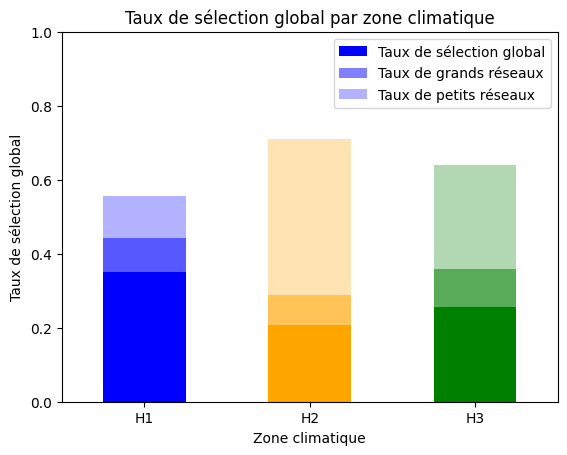

In [14]:
#Graphe taux de sélection global par zone climatique
df_dep_global.groupby("zone_climatique")["taux_selection_global"].mean().plot(kind='bar', color=['blue', 'orange', 'green'])
df_dep_global.groupby("zone_climatique")["taux_big_network"].mean().plot(kind='bar', color=['blue', 'orange', 'green'], alpha=0.5)
df_dep_global.groupby("zone_climatique")["taux_small_network"].mean().plot(kind='bar', color=['blue', 'orange', 'green'], alpha=0.3)
plt.title("Taux de sélection global par zone climatique")
plt.xlabel("Zone climatique")
plt.ylabel("Taux de sélection global")
plt.legend(["Taux de sélection global", "Taux de grands réseaux", "Taux de petits réseaux"])
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

### Graphe par zone climatique

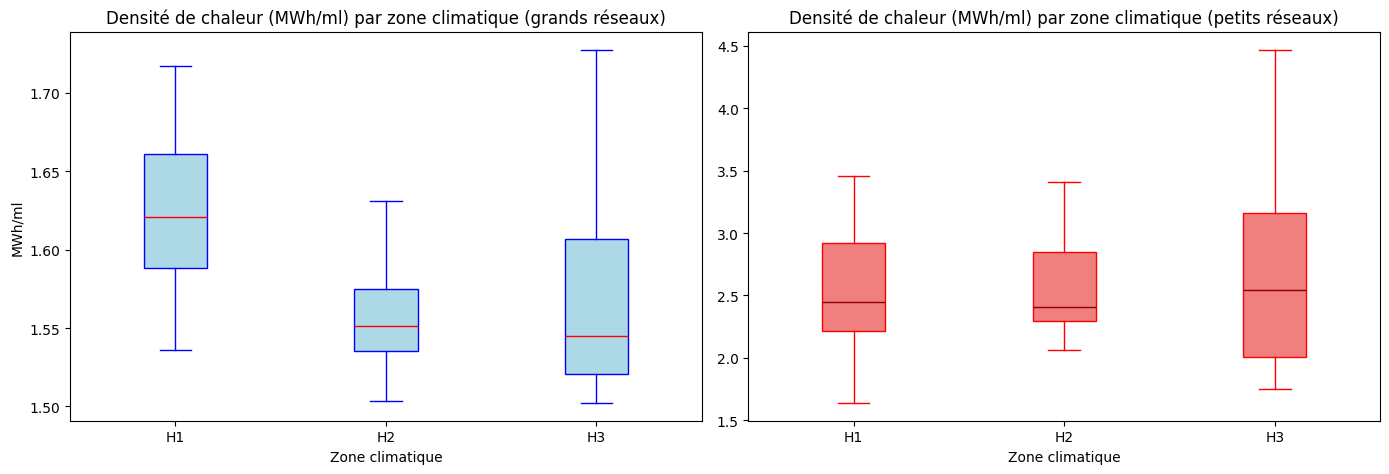

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grands réseaux
df_final_big.boxplot(
    column="density_MWh",
    by="zone_climatique",
    ax=axes[0],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)
axes[0].set_title("Densité de chaleur (MWh/ml) par zone climatique (grands réseaux)")
axes[0].set_xlabel("Zone climatique")
axes[0].set_ylabel("MWh/ml")


# Petits réseaux
df_final_small.boxplot(
    column="density_MWh",
    by="zone_climatique",
    ax=axes[1],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral', color='red'),
    medianprops=dict(color='darkred'),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red')
)
axes[1].set_title("Densité de chaleur (MWh/ml) par zone climatique (petits réseaux)")
axes[1].set_xlabel("Zone climatique")

fig.suptitle("")


plt.tight_layout()
plt.show()
    

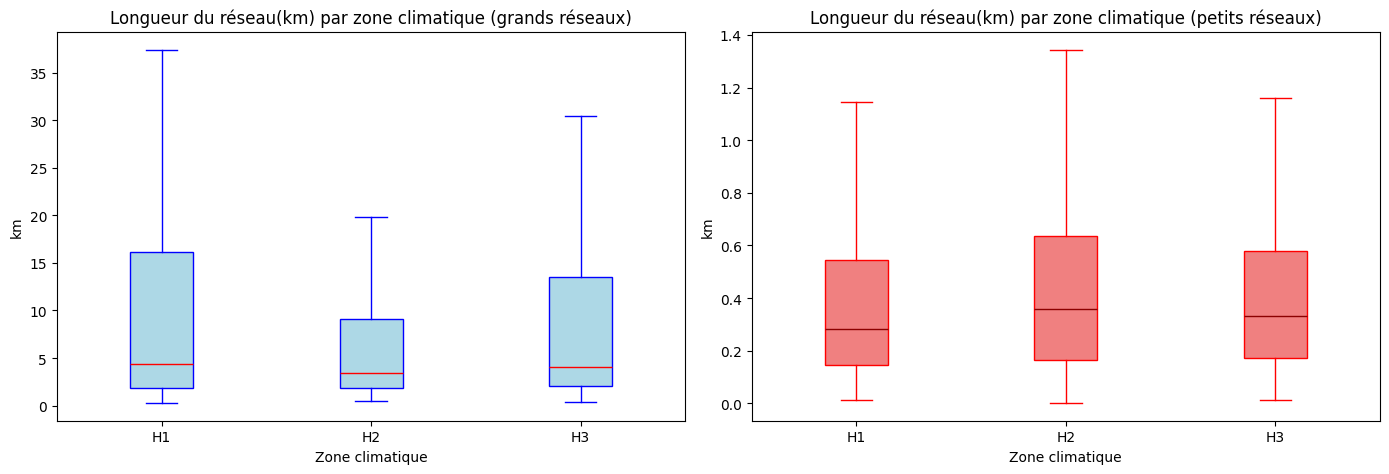

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grands réseaux
df_big.boxplot(
    column="network_length_km",
    by="zone_climatique",
    ax=axes[0],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)
axes[0].set_title("Longueur du réseau(km) par zone climatique (grands réseaux)")
axes[0].set_xlabel("Zone climatique")
axes[0].set_ylabel("km")

# Petits réseaux
df_small.boxplot(
    column="network_length_km",
    by="zone_climatique",
    ax=axes[1],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral', color='red'),
    medianprops=dict(color='darkred'),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red')
)
axes[1].set_title("Longueur du réseau(km) par zone climatique (petits réseaux)")
axes[1].set_xlabel("Zone climatique")
axes[1].set_ylabel("km")

fig.suptitle("")

plt.tight_layout()
plt.show()


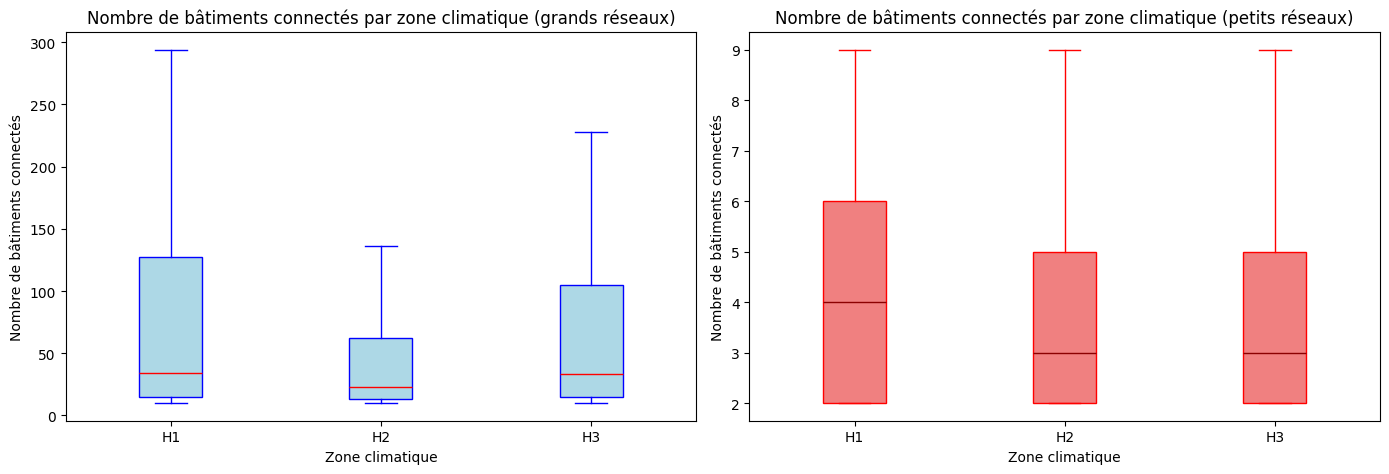

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grands réseaux
df_big.boxplot(
    column="nb_buildings_connected",
    by="zone_climatique",
    ax=axes[0],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)
axes[0].set_title("Nombre de bâtiments connectés par zone climatique (grands réseaux)")
axes[0].set_xlabel("Zone climatique")
axes[0].set_ylabel("Nombre de bâtiments connectés")

# Petits réseaux
df_small.boxplot(
    column="nb_buildings_connected",
    by="zone_climatique",
    ax=axes[1],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral', color='red'),
    medianprops=dict(color='darkred'),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red')
)
axes[1].set_title("Nombre de bâtiments connectés par zone climatique (petits réseaux)")
axes[1].set_xlabel("Zone climatique")
axes[1].set_ylabel("Nombre de bâtiments connectés")

fig.suptitle("")

plt.tight_layout()
plt.show()


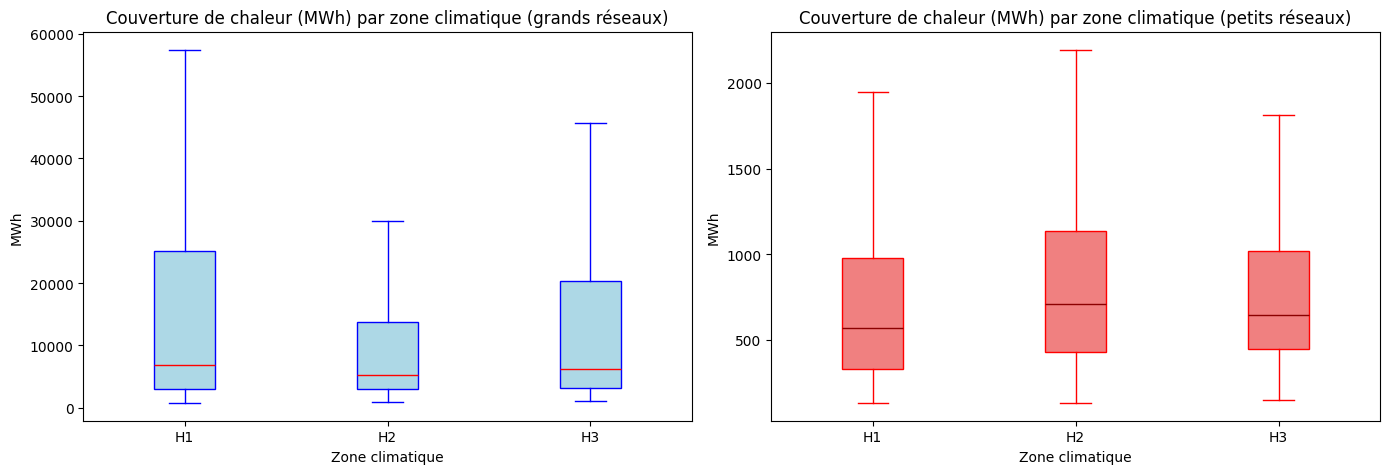

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grands réseaux
df_big.boxplot(
    column="heat_coverage_MWh",
    by="zone_climatique",
    ax=axes[0],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)
axes[0].set_title("Couverture de chaleur (MWh) par zone climatique (grands réseaux)")
axes[0].set_xlabel("Zone climatique")
axes[0].set_ylabel("MWh")

# Petits réseaux
df_small.boxplot(
    column="heat_coverage_MWh",
    by="zone_climatique",
    ax=axes[1],
    grid=False,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral', color='red'),
    medianprops=dict(color='darkred'),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red')
)
axes[1].set_title("Couverture de chaleur (MWh) par zone climatique (petits réseaux)")
axes[1].set_xlabel("Zone climatique")
axes[1].set_ylabel("MWh")

fig.suptitle("")

plt.tight_layout()
plt.show()
